# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

#import math ##maybe not this one

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to restrict the float value to 3 decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Command to tell Python to display the graphs ; no hastags on same line as the code below
#MAYBE?? test to see
#%matplotlib inline

#import plotly.express as px #3d interactive graphs can save as html and put on websites ###DELETE!!!!

### Understanding the structure of the data

In [ ]:
#run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Python Foundations Course UT/Project # 1 full code/foodhub_order.csv')
# returns the first 5 rows
df.head()

order_id  customer_id            restaurant_name cuisine_type  \
0   1477147       337525                    Hangawi       Korean   
1   1477685       358141  Blue Ribbon Sushi Izakaya     Japanese   
2   1477070        66393                Cafe Habana      Mexican   
3   1477334       106968  Blue Ribbon Fried Chicken     American   
4   1478249        76942           Dirty Bird to Go     American   

   cost_of_the_order day_of_the_week     rating  food_preparation_time  \
0             30.750         Weekend  Not given                     25   
1             12.080         Weekend  Not given                     25   
2             12.230         Weekday          5                     23   
3             29.200         Weekend          3                     25   
4             11.590         Weekday          4                     25   

   delivery_time  
0             20  
1             23  
2             28  
3             15  
4             24

#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer and the columns contain attributes of each order.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# returns the shape attribute, or number of rows and columns, in the dataframe
df.shape

(1898, 9)

#### Observations:
The dataset has 1898 rows and 9 columns of data.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# use info() for a summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
In the DataFrame, there are:
*  4 columns of the integer (int64) data type
    - order id, customer id, food preparation time, and delivery time,
*  4 columns of the object data type
    - restaurant name, cuisine type, day of week, and rating,
*  and 1 column of the float (float64) data type
    - cost of the order.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# to return the number of missing values in the data
# df.isnull().sum #one approach to double-check
df.isna().sum() #second approach to double-check


order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [ ]:
# calculate number of "not given" values in rating columns
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

In [ ]:
#check for duplicate entries in dataset
df.duplicated().sum()

0

#### Observations:
There are 1898 entries in the dataset with no empty cells (from the info, isnull, and isna results above) and no duplicate entries (from duplicated above).  However, we can see in the 'rating' column some cells have values that are numeric and some that are string (rating column is object data type).  This is because not all customers gave ratings on their order.  There are 736 orders with non-numberic ratings (see also Question #5 below).

There was no treatment given to the dataset at this time since there are no missing values.

The rating column was not dropped nor were the observations that have "Not given" in the rating column.  These values are needed for analysis in order to have full picture when answering the business questions and drawing insights.  We can address the "Not given" values further into the analysis by creating a separate data frame with those observations dropped or by converting "Not given" values to NaN, if needed.


#Data cleaning needed here
During analysis below, it was discovered there are a few orders that will have some changes in Restaurant Name or Cuisine Type.  The detailed note of changes is below.  I will make the changes here for the remainder of the analysis.

Note:  
1. There are 10 orders for The Meatball Shop (restaurant) that are listed as "American" cuisine while the other 112 orders are listed as "Italian".  Looking at total number of orders, changing the 20 orders listed as "American" to "Italian" would not change the ranking of the cuisines.  American would still rank first with 20 fewer orders and Italian would still rank third with 20 additional orders.  However, it is more accuately described as "Italian" cuisine, so I have chosen to replace the orders with "American" as the cuisine to "Italian".  Research was conducted on the website for The Meatball Shop @ https://www.themeatballshop.com/ and it is Italian cuisine.
2. There are 9 orders for Vanessa's Dumpling House (Chinese) and 13 orders for Vanessa's Dumpling.  Research was conducted on the website @ https://www.vanessas.com/about-us and there is no listing for Vanessa's Dumpling, so the restaurant name for these 13 orders will be replaced with Vanessa's Dumpling House
3.  There are 3 orders for Dirty Bird To Go (archived) and 4 orders for Dirty Bird to go.  The orders with 'archived' in the restaurant name will be replaced with Dirty Bird To Go and the orders with Dirty Bird to go will be replaced with Dirty Bird To Go.  According to Yelp and other websites, this resaurant closed in 2019:  https://www.yelp.com/biz/dirty-bird-to-go-new-york
4. There are 5 different restaurants listed with Blue Ribbon in the name.  Two are American cuisine and 3 are Japanese cuisine.  Looking on the restaurant group's website @ https://www.blueribbonrestaurants.com/ I see each restaurant listed in the dataset have their own branding, names, and the cuisines.  These will NOT be combined in the dataframe.
5. Gaia Italian Cafe and Galli Restaurant (Italian cuisine) appear to be two different restaurants and will NOT be combined.  Research was conducted on the website for Gaia Italian Cafe @ https://www.gaiaitaliancafe.com/ and Galli Restaurant @ https://www.yelp.com/biz/galli-new-york-5
6. Dos Caminos and Dos Caminos Soho are different locations of the same restaurant.  Since we are not looking into more granular details of location in this analysis, I will combine these under the restaurant name, Dos Caminos. Research was conducted on the website @ https://www.doscaminos.com/store-locator/
7.  RedFarm Broadway and RedFarm Hudson are different locations of the same restaurant.  Since we are not looking into more granular details of location in this analysis, I will combine these under the restaurant name, RedFarm. Research was conducted on the website @ https://www.redfarmnyc.com/
8. Sarabeth's, Sarabeth's East, Sarabeth's Restaurant, and Sarabeth's West are different locations of the same restaurant.  Since we are not looking into more granular details of location in this analysis, I will combine these under the restaurant name, Sarabeth's. Research was conducted on the website @ https://sarabethsrestaurants.com/locations/
9. Sushi of Gari, Sushi of Gari 46, and Sushi of Gari Tribeca are different locations of the same restaurant.  Since we are not looking into more granular details of location in this analysis, I will combine these under the restaurant name, Sushi of Gari.  Research was conducted on the website @ https://www.sushiofgari.com/
10. One of the restaurants as some glyphs tagged at the end of the name and is causing error messages about font incapatibility. I will replace "Joe's Shanghai _Àü£¾÷´" with Joe's Shanghai, a New York restaurant. Research was conducted on the website @ https://www.joeshanghairestaurants.com/
11. ne of the restaurants as some glyphs tagged at the end of the name and is causing error messages about font incapatibility. I will replace "Big Wong Restaurant _¤¾Ñ¼" wtih Big Wong, a New York restaurant. Research was conducted on the website @ http://www.big-wong.com/

In [ ]:
# replacing value as noted in # 11 above
df.replace(to_replace="Big Wong Restaurant _¤¾Ñ¼" , value='Big Wong Restaurant', inplace=True)
# replacing value as noted in # 10 above
df.replace(to_replace='Joe\'s Shanghai _Àü£¾÷´', value='Joe\'s Shanghai', inplace=True)
# replacing value as noted in # 9 above
df.replace(to_replace='Sushi of Gari 46', value='Sushi of Gari', inplace=True)
df.replace(to_replace='Sushi of Gari Tribeca', value='Sushi of Gari', inplace=True)
# replacing value as noted in # 8 above
df.replace(to_replace='Sarabeth\'s East', value='Sarabeth\'s', inplace=True)
df.replace(to_replace='Sarabeth\'s Restaurant', value='Sarabeth\'s', inplace=True)
df.replace(to_replace='Sarabeth\'s West', value='Sarabeth\'s', inplace=True)
# replacing value as noted in # 7 above
df.replace(to_replace='RedFarm Broadway', value='RedFarm', inplace=True)
df.replace(to_replace='RedFarm Hudson', value='RedFarm', inplace=True)
# replacing value as noted in # 6 above
df.replace(to_replace='Dos Caminos Soho', value='Dos Caminos', inplace=True)
# replacing value as noted in # 3 above
df.replace(to_replace='Dirty Bird To Go (archived)', value='Dirty Bird To Go', inplace=True)
df.replace(to_replace='Dirty Bird to go', value='Dirty Bird To Go', inplace=True)
# replacing value as noted in # 2 above
df.replace(to_replace='Vanessa\'s Dumpling House', value='Vanessa\'s Dumpling', inplace=True)


In [ ]:
# replacing value as noted in # 1 above
df.loc[(df['restaurant_name'] == "The Meatball Shop") & (df['cuisine_type'] == "American"), 'cuisine_type'] = 'Italian'


In [ ]:
# check that entries were replaced
pd.set_option('display.max_rows', None)
df.groupby(['restaurant_name',])['cuisine_type'].value_counts().to_frame()


cuisine_type
restaurant_name                       cuisine_type                
'wichcraft                            American                   1
12 Chairs                             Middle Eastern             4
5 Napkin Burger                       American                   5
67 Burger                             American                   1
Alidoro                               American                   1
Amma                                  Indian                     4
Amy Ruth's                            Southern                   3
Anjappar Chettinad                    Indian                     1
Asuka Sushi                           Japanese                   3
Aurora                                Italian                    2
Balade                                Middle Eastern             1
Balthazar Boulangerie                 French                    10
Barbounia                             Mediterranean              6
Bareburger                            American                  27
Benihana                              Japanese                   5
Bhatti Indian Grill                   Indian                     2
Big Daddy's                           American                   2
Big Wong Restaurant                   Chinese                    1
Bistango                              Italian                    2
Blue Ribbon Brooklyn                  American                   4
Blue Ribbon Fried Chicken             American                  96
Blue Ribbon Sushi                     Japanese                 119
Blue Ribbon Sushi Bar & Grill         Japanese                  44
Blue Ribbon Sushi Izakaya             Japanese                  29
Boqueria                              Spanish                    9
Bubby's                               American                   3
Bukhara Grill                         Indian                     2
Burger Joint                          American                  12
Byblos Restaurant                     Middle Eastern             2
Cafe Habana                           Mexican                   16
Cafe Mogador                          Middle Eastern            18
Cafe de La Esquina                    Mexican                    1
Cafeteria                             American                   9
CafÌ© China                           Chinese                    6
Carmine's                             Italian                    3
Chipotle Mexican Grill $1.99 Delivery Mexican                   23
Cho Dang Gol                          Korean                     6
Chola Eclectic Indian Cuisine         Indian                     1
Chote Nawab                           Indian                     1
Cipriani Le Specialita                Italian                    1
Coppola's East                        Italian                    1
Crema Restaurante                     Mexican                    1
Delicatessen                          American                   5
DespaÌ±a                              Spanish                    2
Dickson's Farmstand Meats             American                   3
Dig Inn Seasonal Market               American                   1
Dirty Bird To Go                      American                   3
Dirty Bird to Go                      American                   4
Don's Bogam BBQ & Wine Bar            Korean                     3
Donburi-ya                            Japanese                   7
Dos Caminos                           Mexican                    9
DuMont Burger                         American                   3
El Parador Cafe                       Mexican                    2
Empanada Mama (closed)                Mexican                   13
Emporio                               Italian                    1
Five Guys Burgers and Fries           American                  29
Five Leaves                           American                   4
Frank Restaurant                      Italian                    1
Friend of a Farmer                

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# returns a statistical summary of all columns with numeric values, transposed
df.describe().T

count        mean        std         min         25%  \
order_id              1898.000 1477495.500    548.050 1476547.000 1477021.250   
customer_id           1898.000  171168.478 113698.140    1311.000   77787.750   
cost_of_the_order     1898.000      16.499      7.484       4.470      12.080   
food_preparation_time 1898.000      27.372      4.632      20.000      23.000   
delivery_time         1898.000      24.162      4.973      15.000      20.000   

                              50%         75%         max  
order_id              1477495.500 1477969.750 1478444.000  
customer_id            128600.000  270525.000  405334.000  
cost_of_the_order          14.140      22.297      35.410  
food_preparation_time      27.000      31.000      35.000  
delivery_time              25.000      28.000      33.000

In [ ]:
# returns a summary of the columns with categorical values by column
print('restaurant name summary:\n',df['restaurant_name'].describe(),'\n','_'*50)
print('\ncuisine type summary:\n',df['cuisine_type'].describe(),'\n','_'*50)
print('\nday of the week summary:\n',df['day_of_the_week'].describe(),'\n','_'*50)
print('\nrating summary:\n',df['rating'].describe())
print('_'*51)


restaurant name summary:
 count            1898
unique            171
top       Shake Shack
freq              219
Name: restaurant_name, dtype: object 
 __________________________________________________

cuisine type summary:
 count         1898
unique          14
top       American
freq           564
Name: cuisine_type, dtype: object 
 __________________________________________________

day of the week summary:
 count        1898
unique          2
top       Weekend
freq         1351
Name: day_of_the_week, dtype: object 
 __________________________________________________

rating summary:
 count          1898
unique            4
top       Not given
freq            736
Name: rating, dtype: object
___________________________________________________


In [ ]:
# for comparison to the describe statistical summary above,
# another approach to find statistical summary of values in column requested

max_time = df['food_preparation_time'].max()
min_time = df['food_preparation_time'].min()
ave_time = df['food_preparation_time'].mean()
med_time = df['food_preparation_time'].median()
print("max =", max_time)
print("min =", min_time)
print("ave =", ave_time)
print("med =", med_time)

max = 35
min = 20
ave = 27.371970495258168
med = 27.0


#### Observations:
According to a statistical summary of the numeric columns from the data, after the food order is placed the:
*   minimum time it takes for food to be prepared = 20 minutes,
*   maximum time it takes for food to be prepared = 35 minutes, and
*   average time it takes for food to be prepared = 27.4 minutes.

The median and the average time it takes for food to be prepared are similar so the data in this column seem evenly distributed and we can confirm with visualizations further into the analysis.

Other observations:
**   The total cost of orders has a range of about \$31 with the minimum cost of \$4.47 and the maximum of \$35.41.  There appears to be some skew to this column of data since the 25th percentile is \$12.08, the median is \$14.14 (lower than the average cost of \$16.50), and the 75th percentile is \$22.30.  There is a smaller difference between Q1 and Q2 than there is between Q2 and Q3 which indicates a right skew of data with a few higher total orders pulling the average higher.  We will see more in the visual analysis of the data below.
*   The average delivery time is about 24 minutes and is near the median value is 25 minutes indicating the data in this column appear evenly distributed.  The minimum delivery time is 15 minutes and the maximum is 33 minutes.
* There are 171 different restaurants in the dataset and these restaurants represent 14 different types of cuisine.  The most popular restaurant is Shake Shack and the most popular cuisine is American in the dataset.
* Most of the Food Hub app orders are on the weekends.


Note:  Categorial data summary included to learn more about the data.  The business question relates to the demand of different restaurants which is categorical in nature.  

### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# code to calculate number of "not given" values in rating columns
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

In [ ]:
m = (736/1898)*100
print('Percentage of data with no ratings given: ',m)

Percentage of data with no ratings given:  38.77766069546891


#### Observations:  
There are 736 'Not given' ratings of the 1898 total observations which is about 39% of the total data.  From the categorical summary in question # 4, we see 'Not given' is the most frequent value for the column.  More analysis on ratings are below.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

###Column 1:  Order ID


In [ ]:
# count plot of categorical values in series/column
plt.figure(figsize=(200, 30))
plt.title('Count Plot: Order IDs')
dax = sns.countplot(data=df, x ='order_id')
dax.set_xticklabels(dax.get_xticklabels(), fontsize=6)
plt.tight_layout()
plt.xlabel('Order ID')
plt.xticks(rotation=90);


This column shows a unique order id number generated for each order on the Food Hub app.  The visualization was created as the question requested.  This visualization is very difficult to read due to the number of orders.  There is also not meaningful insight to be gleaned from this variable.  Every order count will be 1 since each order is given a unique id.  Some stakeholders support deleting this variable from the dataset.

###Column 2:  Customer ID

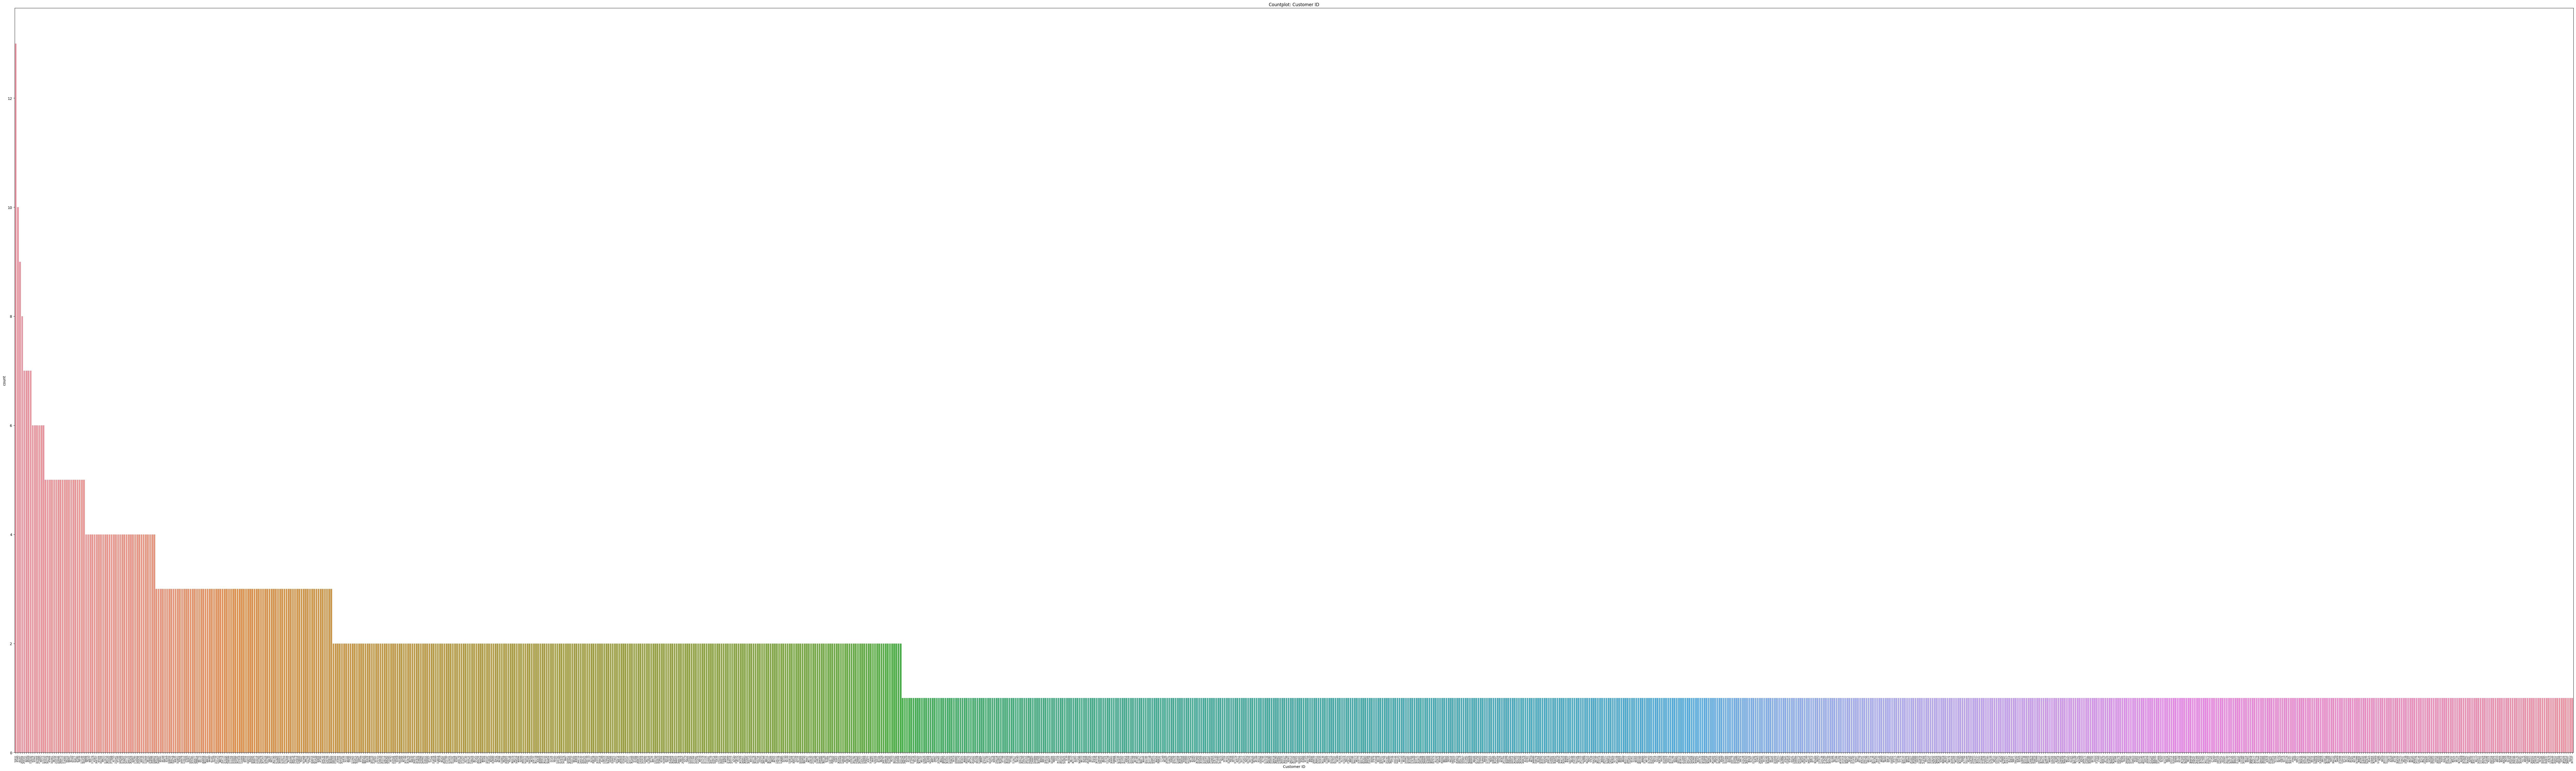

In [ ]:
# count plot of categorical values in series/column, sorted by value count for each customer
plt.figure(figsize=(100, 30))
plt.title('Countplot: Customer ID')
plt.xlim(1300,41000)
plt.xticks(rotation=90)
bax = sns.countplot(data=df, x ='customer_id',order=df['customer_id'].value_counts().index)
bax.set_xticklabels(bax.get_xticklabels(), fontsize=6)
plt.tight_layout()
plt.xlabel('Customer ID');


In [ ]:
# creating 4 customer labels for repeat customers column, explore information
# customer label based on number of orders
# 10-13 orders,
# 6-10 orders,
# 2-5 orders, and
# 1 order only

# create df subset
customer_by_num_orders = df['customer_id'].copy()
# customer_by_num_orders.head() # check df created

# number of orders by customers
customer_by_num_orders = customer_by_num_orders.value_counts().reset_index(name='counts')
#customer_by_num_orders   # check for correctness

# create customer lables based on number of orders
customer_by_num_orders['customer_id_labels'] = pd.cut(customer_by_num_orders['counts'],bins=[0,1,5,10,13],labels=['One','Two to Five','Six to Ten','> Ten'])
#customer_by_num_orders.head() #check that column is created
print(customer_by_num_orders['customer_id_labels'].value_counts())

# create subset dataframes by labels
over_10_df = customer_by_num_orders[customer_by_num_orders['customer_id_labels']== '> Ten']
# over_10_df  # check for correctness
six_to_ten_df = customer_by_num_orders[customer_by_num_orders['customer_id_labels']== 'Six to Ten']
#six_to_ten_df  # check for correctness
two_to_five_df = customer_by_num_orders[customer_by_num_orders['customer_id_labels']== 'Two to Five']
#two_to_five_df  # check for correctness
one_df = customer_by_num_orders[customer_by_num_orders['customer_id_labels']== 'One']
#one_df  # check for correctness

# find percentages of the 4 labels
percentage_over_10 = ((over_10_df.shape[0])/(customer_by_num_orders.shape[0])) * 100
print('\nPercentage of repeat customers that order more than 10 times: ',percentage_over_10)
percentage_6_to_10 = ((six_to_ten_df.shape[0])/(customer_by_num_orders.shape[0])) * 100
print('\nPercentage of repeat customers that order 6-10 times: ',percentage_6_to_10)
percentage_2_to_5 = ((two_to_five_df.shape[0])/(customer_by_num_orders.shape[0])) * 100
print('\nPercentage of repeat customers that order 2-5 times: ',percentage_2_to_5)
percentage_1 = ((one_df.shape[0])/(customer_by_num_orders.shape[0])) * 100
print('\nPercentage of repeat customers that order 1 time: ',percentage_1)


One            784
Two to Five    402
Six to Ten      13
> Ten            1
Name: customer_id_labels, dtype: int64

Percentage of repeat customers that order more than 10 times:  0.08333333333333334

Percentage of repeat customers that order 6-10 times:  1.0833333333333335

Percentage of repeat customers that order 2-5 times:  33.5

Percentage of repeat customers that order 1 time:  65.33333333333333


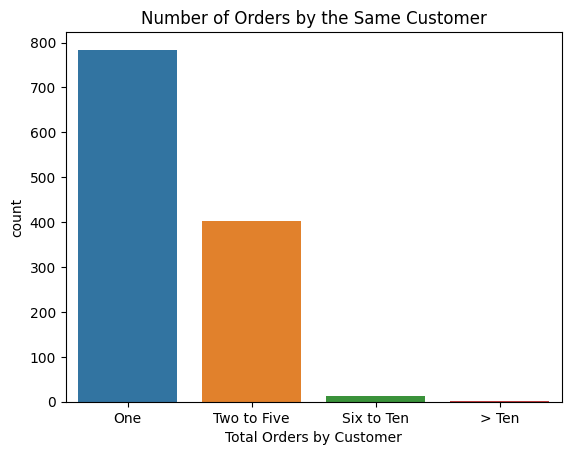

In [ ]:
# visualization by repeat customers of Fodd Hub app
plt.title('Number of Orders by the Same Customer')
sns.countplot(data=customer_by_num_orders, x='customer_id_labels')
plt.xlabel('Total Orders by Customer')
plt.show();

This column shows a unique customer id number generated for each customer on the Food Hub app.  The visualization was created as the question requested.  Though difficult to read due to the large number of customers, we are able to see that there are returning customers who use the Food Hub app.

A subset of this column of data was created to look at the number of repeat orders by a customer. The following more detailed information can be seen:
*  1, or 0.08% of customers, have used the Food Hub app to order 10 or more times,
* 13, or 1.08% of customers, have ordered 6-10 times,
* 402, or 33.5% of customers, have ordered 2-5 times, and
* 784, or 65.3% of customers have ordered one time with the Food Hub app.

More analysis will be done on top customers below.

###Column 3:  Restaurant Name

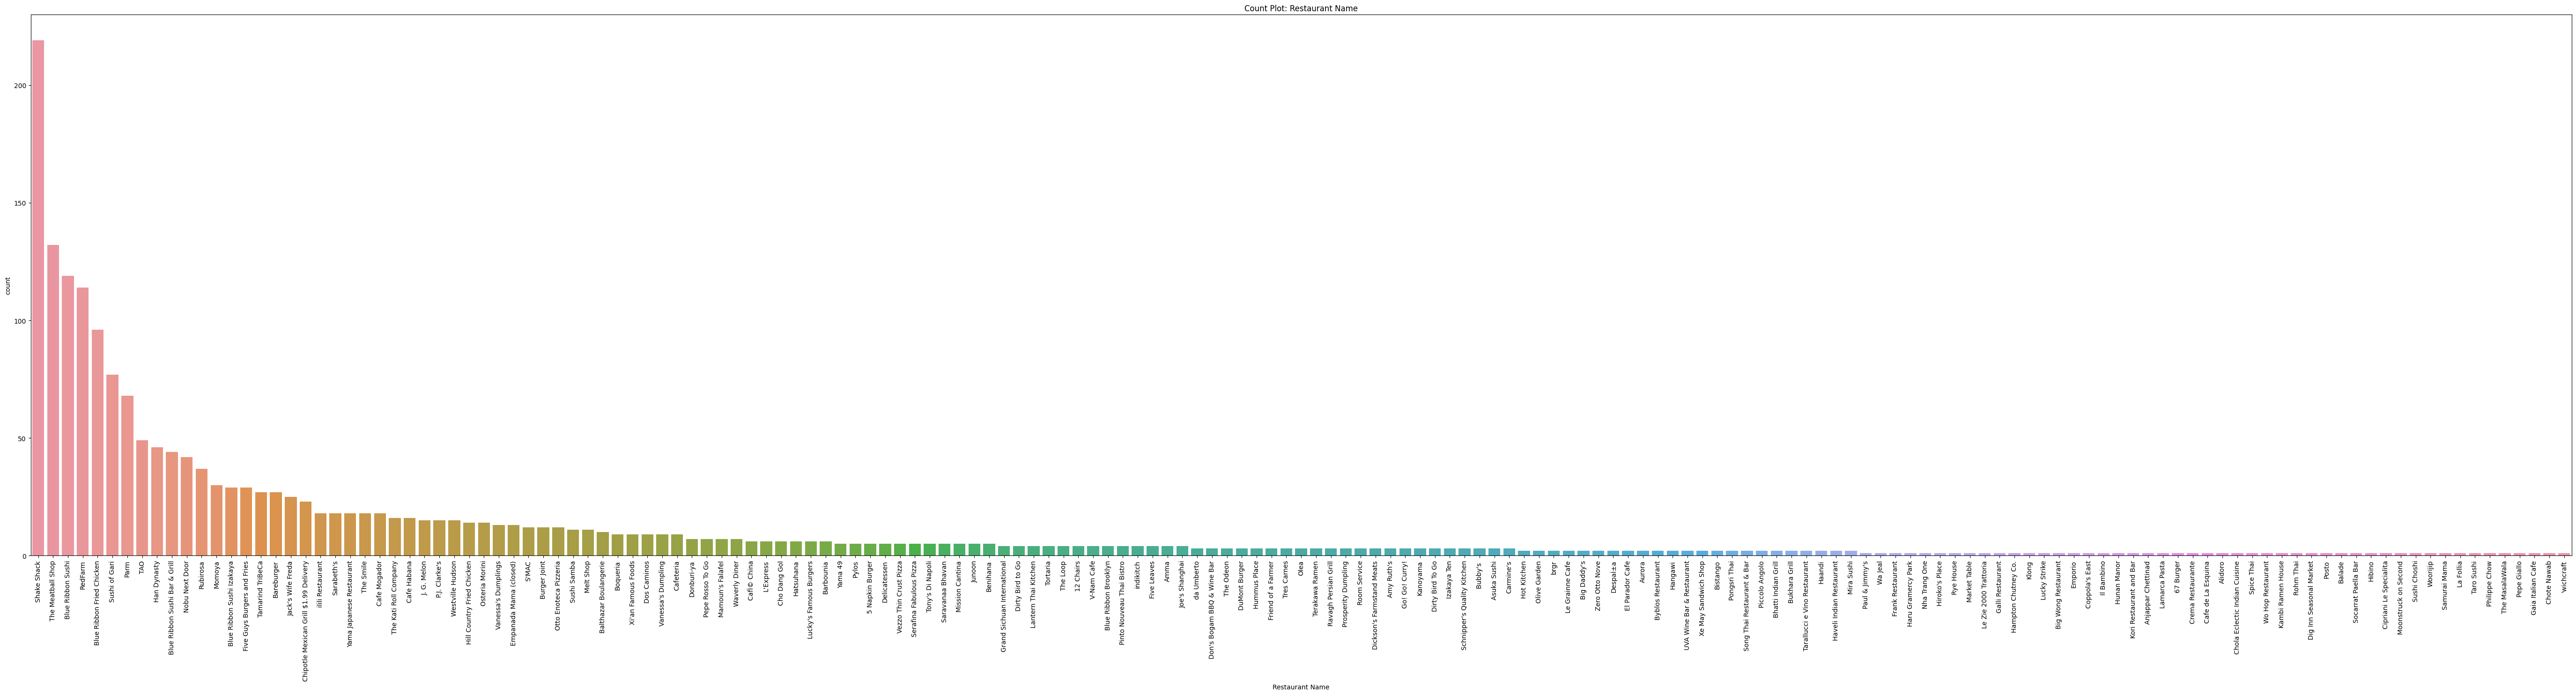

In [ ]:
# count plot of categorical values in series/column, sorted by value count for each restaurant
plt.figure(figsize=(70, 15))
plt.title('Count Plot: Restaurant Name')
sns.countplot(data=df, x ='restaurant_name',order=df['restaurant_name'].value_counts().index)
plt.xlabel('Restaurant Name')
plt.xticks(rotation=90);


In [ ]:
# creating 4 restaurant labels for repeat restaurant orders column, explore information
# restaurant label based on number of orders
# more than 100 orders,
# 51-100 orders,
# 26-50 orders, and
# 1-25 orders

# count by value of restaurant name, save in a df
restaurant_rank_num_orders = df['restaurant_name'].value_counts().reset_index(name='order count')
# show top 5 restaurants by number of orders
#restaurant_rank_num_orders.head() # check for correctness

#restaurant_rank_num_orders.tail(51) # checking the lowest 50 restaurants that all have only 1 order

# create customer lables based on number of orders
restaurant_rank_num_orders['restaurant_orders_labels'] = pd.cut(restaurant_rank_num_orders['order count'],bins=[0,25,50,100,300],labels=['1 to 25','26 to 50','51 to 100','over 100'])
#restaurant_rank_num_orders.head() #check that column is created
print(restaurant_rank_num_orders['restaurant_orders_labels'].value_counts())

# create subset dataframes by labels
over_100_df = restaurant_rank_num_orders[restaurant_rank_num_orders['restaurant_orders_labels']== 'over 100']
#over_100_df  # check for correctness
fifty_to_100_df = restaurant_rank_num_orders[restaurant_rank_num_orders['restaurant_orders_labels']== '51 to 100']
#fifty_to_100_df  # check for correctness
twentyfive_to_50_df = restaurant_rank_num_orders[restaurant_rank_num_orders['restaurant_orders_labels']== '26 to 50']
#twentyfive_to_50_df  # check for correctness
one_to_25_df = restaurant_rank_num_orders[restaurant_rank_num_orders['restaurant_orders_labels']== '1 to 25']
#one_to_25_df  # check for correctness

# find percentages of the 4 labels
percentage_over_100 = ((over_100_df.shape[0])/(restaurant_rank_num_orders.shape[0])) * 100
print('\nPercentage of restaurants with more than 100 orders: ',percentage_over_100)
percentage_50_to_100 = ((fifty_to_100_df.shape[0])/(restaurant_rank_num_orders.shape[0])) * 100
print('\nPercentage of restaurants with 51 to 100 orders: ',percentage_50_to_100)
percentage_25_to_50 = ((twentyfive_to_50_df.shape[0])/(restaurant_rank_num_orders.shape[0])) * 100
print('\nPercentage of restaurants with 26 to 50 orders: ',percentage_25_to_50)
percentage_1_to_25 = ((one_to_25_df.shape[0])/(restaurant_rank_num_orders.shape[0])) * 100
print('\nPercentage of restaurants with 1 to 25 orders: ',percentage_1_to_25)

1 to 25      154
26 to 50      10
over 100       4
51 to 100      3
Name: restaurant_orders_labels, dtype: int64

Percentage of restaurants with more than 100 orders:  2.3391812865497075

Percentage of restaurants with 51 to 100 orders:  1.7543859649122806

Percentage of restaurants with 26 to 50 orders:  5.847953216374268

Percentage of restaurants with 1 to 25 orders:  90.05847953216374


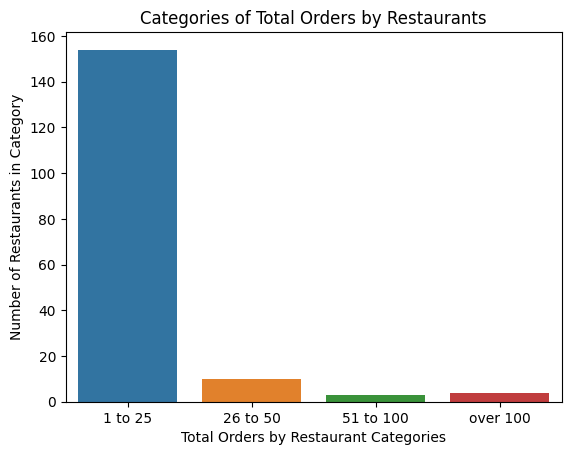

In [ ]:
# visualization by restaurant order groupings
plt.title('Categories of Total Orders by Restaurants')
sns.countplot(data=restaurant_rank_num_orders, x='restaurant_orders_labels')
plt.xlabel('Total Orders by Restaurant Categories')
plt.ylabel('Number of Restaurants in Category')
plt.show();

This column shows the name of the restaurant where each order was placed (categorical data).  The count plot visualization shows the number of times the Food Hub app was used for an order at each restaurants.  It is of interest by the company to explore the demand for different restaurants so the visualization is sorted by frequency of orders to see if there are insights that can be drawn.  
Of the 178 total restaurants, there are:
* 4 restaurants, or 2.3%, with over 100 orders,
* 3 restaurants, or 1.8%, with 51 to 100 orders
* 10 restaurants, or 5.8%, with 26 to 50 orders, and
* 154 restaurants, or 90%, with 1 to 25 orders.

More analysis will be done on restaurants with highest number of orders below.



###Column 4:  Cuisine Type

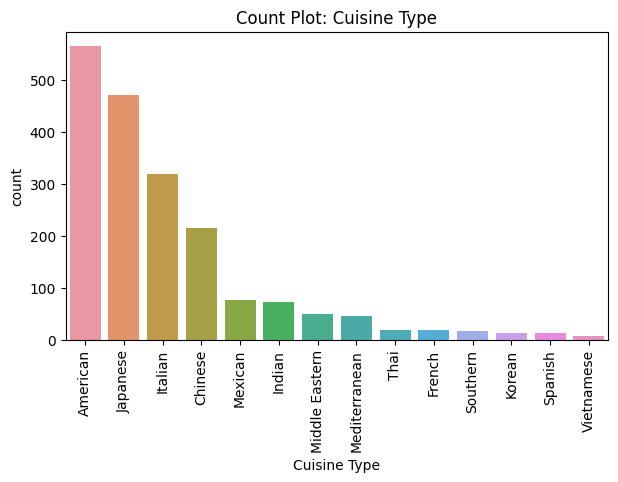

In [ ]:
# count plot of categorical values in series/column
plt.figure(figsize=(7, 4))
plt.title('Count Plot: Cuisine Type')
sns.countplot(data=df, x ='cuisine_type',order=df['cuisine_type'].value_counts().index)
plt.xlabel('Cuisine Type')
plt.xticks(rotation=90);


In [ ]:
df['cuisine_type'].value_counts()

American          564
Japanese          470
Italian           318
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: cuisine_type, dtype: int64

This column shows the type of the cuisine ordered with the Food Hub app (categorical data).  The count plot visualization shows the number of times the Food Hub app was used for an order of each type of cuisine.  It is of interest to the business to explore the demand of different restaurants so the visualization is sorted by the frequency of orders to see if there are insights that can be drawn.  
Of the 14 different types of cuisine:
* 4 types have over 200 orders,
 * American, Japanese, Italian, and Chinese,
* 4 types have 40 to 100 orders,
 * Mexican, Indian, Middle Eastern, and Mediterranean,
* 5 types have 10 to 40 orders, and
 * Thai, French, Southern, Korean, and Spanish,
* 1 has less than 10 total orders
 * Vietnamese.



### The following changes were made in the data cleaning above after being discovered here through analysis.
The following changes were made above after being discovered through analysis.
Note:  
1. There are 10 orders for The Meatball Shop (restaurant) that are listed as "American" cuisine while the other 112 orders are listed as "Italian".  Looking at total number of orders, changing the 20 orders listed as "American" to "Italian" would not change the ranking of the cuisines.  American would still rank first with 20 fewer orders and Italian would still rank third with 20 additional orders.  However, it is more accuately described as "Italian" cuisine, so I have chosen to replace the orders with "American" as the cuisine to "Italian".  Research was conducted on the website for The Meatball Shop @ https://www.themeatballshop.com/ and it is Italian cuisine.
2. There are 9 orders for Vanessa's Dumpling House (Chinese) and 13 orders for Vanessa's Dumpling.  Research was conducted on the website @ https://www.vanessas.com/about-us and there is no listing for Vanessa's Dumpling, so the restaurant name for these 13 orders will be rep.laced with Vanessa's Dumpling House
3.  There are 3 orders for Dirty Bird To Go (archived) and 4 orders for Dirty Bird to go.  The orders with 'archived' in the restaurant name will be replaced with Dirty Bird To Go and the orders with Dirty Bird to go will be replaced with Dirty Bird To Go.  According to Yelp and other websites, this resaurant closed in 2019:  https://www.yelp.com/biz/dirty-bird-to-go-new-york
4. There are 5 different restaurants listed with Blue Ribbon in the name.  Two are American cuisine and 3 are Japanese cuisine.  Looking on the restaurant group's website @ https://www.blueribbonrestaurants.com/ I see each restaurant listed in the dataset have their own branding, names, and the cuisines.  These will NOT be combined in the dataframe.
5. Gaia Italian Cafe and Galli Restaurant (Italian cuisine) appear to be two different restaurants and will NOT be combined.  Research was conducted on the website for Gaia Italian Cafe @ https://www.gaiaitaliancafe.com/ and Galli Restaurant @ https://www.yelp.com/biz/galli-new-york-5
6. Dos Caminos and Dos Caminos Soho are different locations of the same restaurant.  Since we are not looking into more granular details of location in this analysis, I will combine these under the restaurant name, Dos Caminos. Research was conducted on the website @ https://www.doscaminos.com/store-locator/
7.  RedFarm Broadway and RedFarm Hudson are different locations of the same restaurant.  Since we are not looking into more granular details of location in this analysis, I will combine these under the restaurant name, RedFarm. Research was conducted on the website @ https://www.redfarmnyc.com/
8. Sarabeth's, Sarabeth's East, Sarabeth's Restaurant, and Sarabeth's West are different locations of the same restaurant.  Since we are not looking into more granular details of location in this analysis, I will combine these under the restaurant name, Sarabeth's. Research was conducted on the website @ https://sarabethsrestaurants.com/locations/
9. Sushi of Gari, Sushi of Gari 46, and Sushi of Gari Tribeca are different locations of the same restaurant.  Since we are not looking into more granular details of location in this analysis, I will combine these under the restaurant name, Gari.  Research was conducted on the website @ https://www.sushiofgari.com/
10. Some names contain glyphs and are causing error messages with the code.

###Column 5:  Cost of the Order

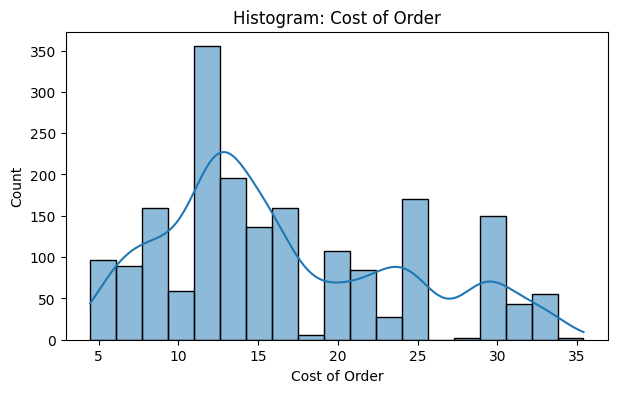

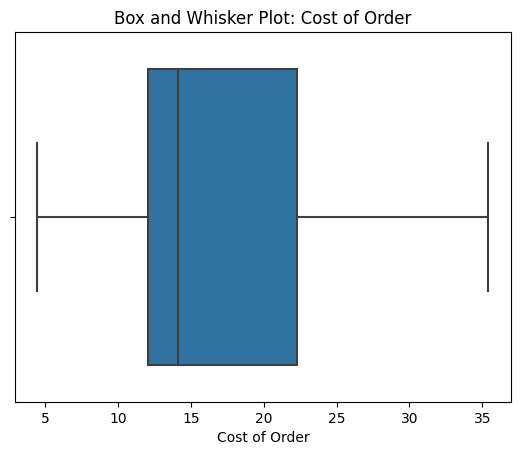

In [ ]:
# histogram of series/column
plt.figure(figsize=(7, 4))
plt.title('Histogram: Cost of Order')
plt.xlabel('Cost of Order')
sns.histplot(data= df, x= 'cost_of_the_order', kde= True);
plt.show()

# box and whisker plot of series/column
plt.title('Box and Whisker Plot: Cost of Order')
sns.boxplot(data= df,x = 'cost_of_the_order')
plt.xlabel('Cost of Order');
plt.show()


Column 5 shows the cost of the order.  As suspected in question #4 above, there is a right (or positive) skew to the data as shown by:
*   the longer whisker to the right and by the median being closer to the left (or top) of the box on the box plot, and
*   the longer tail of data to the right on the histogram.
This indicates a few orders have a total cost over the 75th percentile of $22.  However, there does not appear to be any outliers on the box plot.  Most orders have a total cost of less than \$22.


###Column 6:  Day of the Week

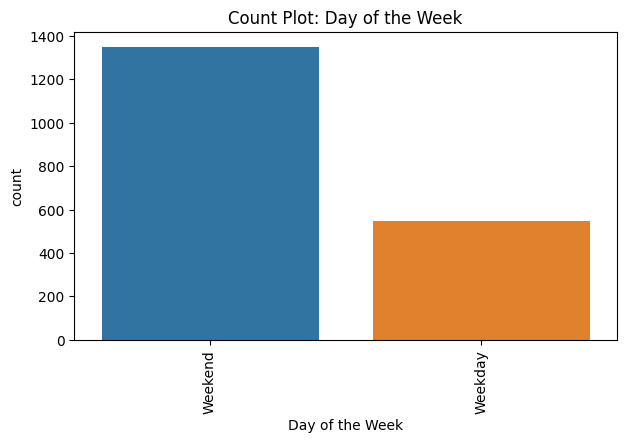

In [ ]:
# count plot of categorical values in series/column
plt.figure(figsize=(7, 4))
plt.title('Count Plot: Day of the Week')
sns.countplot(data=df, x ='day_of_the_week')
plt.xlabel('Day of the Week')
plt.xticks(rotation=90);


In [ ]:
df['day_of_the_week'].value_counts()

Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64

In [ ]:
e = (1351/1898)*100
print('Percentage of orders on the weekend: ',e)

Percentage of orders on the weekend:  71.18018967334035


In [ ]:
d = (547/1898)*100
print('Percentage of orders on the week day: ',d)

Percentage of orders on the week day:  28.81981032665964


Column 6 indicates whether the order was placed on a weekday (Monday-Friday) or a weekend day (Saturday or Sunday).  There are substantially more orders are made on the weekend with a total of 1351 orders or 71% of all orders.  Week day orders total 547 orders or 29%.  The data is categorical in nature so a count plot was used to visualize.

###Column 7:  Rating

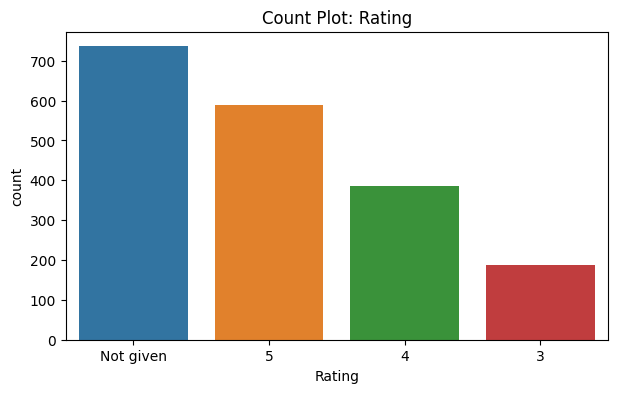

In [ ]:
# count plot of categorical values in series/column
plt.figure(figsize=(7, 4))
plt.title('Count Plot: Rating')
sns.countplot(data=df, x ='rating',order=df['rating'].value_counts().index)
plt.xlabel('Rating');


In [ ]:
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

In [ ]:
f = (588/1898)*100
print('Percentage of data with rating of 5: ',f)

Percentage of data with rating of 5:  30.979978925184405


In [ ]:
m = (736/1898)*100
print('Percentage of data with no ratings given: ',m)

Percentage of data with no ratings given:  38.77766069546891


Column 7 shows the ratings given by customer.  Of all the orders in the dataset, we can see the 736 orders, or 39%, were not given a rating.  We can also see that of the customers that do rate their experience, most (588 or 31%) give a rating of 5.  

###Column 8:  Food Preparation Time

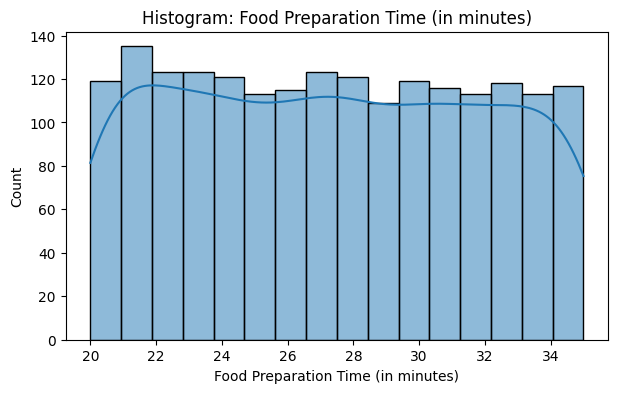

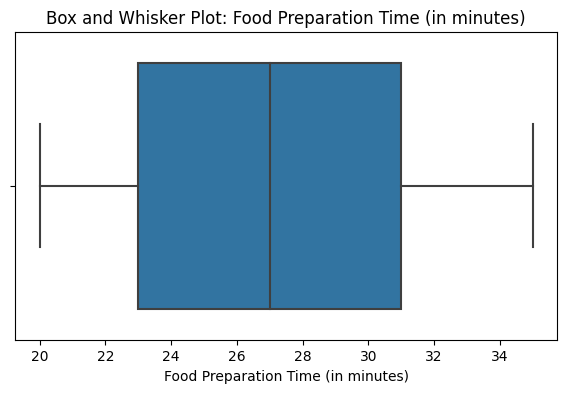

In [ ]:
# histogram of series/column
plt.figure(figsize=(7, 4))
plt.title('Histogram: Food Preparation Time (in minutes)')
sns.histplot(data= df, x= 'food_preparation_time', bins=16, kde=True); # number of bins reflect range of times, 20-35 min.
plt.xlabel('Food Preparation Time (in minutes)')
plt.show()

# box and whisker plot of series/column
plt.figure(figsize=(7, 4))
plt.title('Box and Whisker Plot: Food Preparation Time (in minutes)')
sns.boxplot(data= df,x = 'food_preparation_time')
plt.xlabel('Food Preparation Time (in minutes)');
plt.show()


Column 8 shows the time (in minutes) it takes for the restaurant to prepare the food.  The time is calculated by subtracting the timestamp when the restaurant confirmed an order from the timestamp when the delivery person confirms picks up the order for delivery to the user.  The histogram has a rather uniform distribution so it is equally likely to have the preparation time be between 20 and 34 minutes.  With the box plot, we can see 50% of the data have a food preparation time of 23-31 minutes and the median is 27 minutes.


###Column 9:  Delivery Time

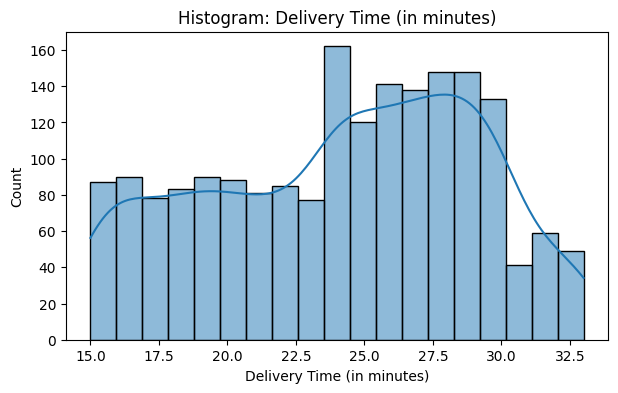

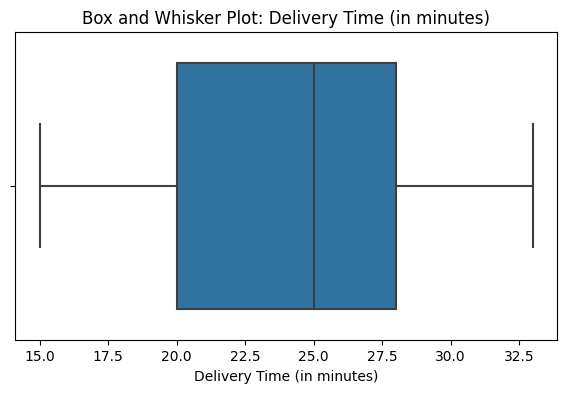

In [ ]:
# histogram of series/column
plt.figure(figsize=(7, 4))
plt.title('Histogram: Delivery Time (in minutes)')
sns.histplot(data= df, x= 'delivery_time', bins=19, kde=True); # number of bins reflect range of times, 15-33 min.
plt.xlabel('Delivery Time (in minutes)');
plt.show()

# box and whisker plot of series/column
plt.figure(figsize=(7, 4))
plt.title('Box and Whisker Plot: Delivery Time (in minutes)')
sns.boxplot(data= df,x = 'delivery_time')
plt.xlabel('Delivery Time (in minutes)');
plt.show()


In [ ]:
# creating 3 bins for delivery time column
# 30-33 minutes to deliver,
# 24-30 minutes to deliver, and
# 0-24 minutes to deliver

df['delivery_time_bins'] = pd.cut(df['delivery_time'],bins=[0,24,30,35],labels=['Quick','Moderate','Slow'])
#df.head() #check that column is created
print(df['delivery_time_bins'].value_counts())



# create subset dataframes by bins for delivery time column
over_30_to_33_df = df[df['delivery_time_bins'] == 'Slow']
# over_30_to_33_df  # check for correctness
btwn_24_to_30_df = df[df['delivery_time_bins'] == 'Moderate']
#btwn_24_to_30_df  # check for correctness
under_24_df = df[df['delivery_time_bins'] == 'Quick']
#under_24_df  # check for correctness


# find percentages of the 3 delivery time bins
percentage_over_30_to_33 = ((over_30_to_33_df.shape[0])/(df.shape[0])) * 100
print('\nPercentage of deliveries over 30 minutes: ',percentage_over_30_to_33)
percentage_btwn_24_to_30 = ((btwn_24_to_30_df.shape[0])/(df.shape[0])) * 100
print('\nPercentage of deliveries between 24 - 30 minutes: ',percentage_btwn_24_to_30)
percentage_under_24_df = ((under_24_df.shape[0])/(df.shape[0])) * 100
print('\nPercentage of deliveries under 24 minutes: ',percentage_under_24_df)


Quick       921
Moderate    828
Slow        149
Name: delivery_time_bins, dtype: int64

Percentage of deliveries over 30 minutes:  7.8503688092729185

Percentage of deliveries between 24 - 30 minutes:  43.62486828240253

Percentage of deliveries under 24 minutes:  48.524762908324554


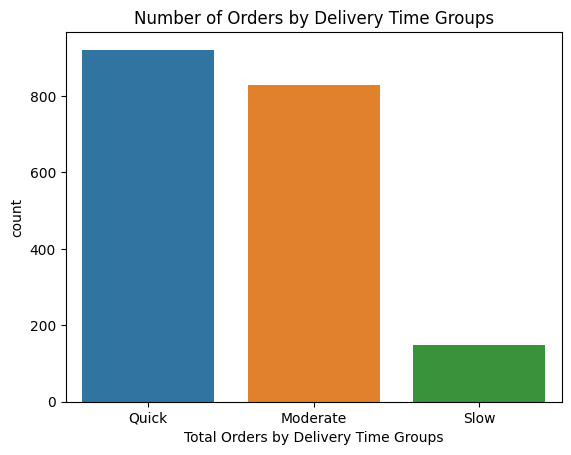

In [ ]:
# visualization by delivery time groupings
plt.title('Number of Orders by Delivery Time Groups')
sns.countplot(data=df, x='delivery_time_bins')
plt.xlabel('Total Orders by Delivery Time Groups')
plt.show();

Column 9 shows delivery time (in minutes).  This is the time is takes for the delivery person to deliver the food to the customer that placed the order in the manner that the customer indicted when ordering.  It is found by subtracting the timestamp confirmation when the food is picked up from the restaurant from the timestamp confirmation when the food is delivered to the customer.  There appears to be 2-3 groupings of the data that appear in the histogram of the distribution.

Three bins were created to explore the categories further and can be used in further analysis.  

Of the 1898 orders,
* a small group of orders, 149 or 7.9% of orders, were delivered in over 30 minutes.
* a group of orders, 828 or 43.6% of orders, were delivered in between 24 and 30 minutes, and
* a group of orders, 921 or 48.5% of orders, were delivered in less than 24 minutes.

Since the food preparation time is of uniform distribution, the delivery time could offer insights.

Since the company that provides the Food Hub app also provides deliver drivers, there could be more insights to be drawn with this information further into the analysis.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# show top 5 restaurants by number of orders created previously
restaurant_rank_num_orders.head()


index  order count
0                Shake Shack          219
1          The Meatball Shop          132
2          Blue Ribbon Sushi          119
3  Blue Ribbon Fried Chicken           96
4                       Parm           68

In [ ]:
###snazzy code stopped working when I created the df above:

# visualization of all restaurants ranked by number of orders
# plt.figure(figsize=(7, 4))
# plt.title('Bar Chart: Restaurants Ranked by Number of Orders')
# plt.xlabel('Restaurant Name')
# plt.xticks(rotation=90);
# restaurant_rank_num_orders[:5].plot(kind='barh');

# reference for visualization code:  https://mode.com/python-tutorial/counting-and-plotting-in-python/

#### Observations:  The top 5 restaurants by number of orders are:

1.   Shake Shack with 219 orders,
2.   The Meatball Shop with 132 orders,
3.   Blue Ribbon Sushi with 119 orders,
4.   Blue Ribbon Fried Chicken with 96 orders, and
5.   Parm with 68 orders.


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# create new dataframe with subset of 2 columns from full dataframe
weekend_cuisine_favs = df[['cuisine_type','day_of_the_week']].copy()
# group dataframe by cuisine type and display the value counts for day of the week , for all dataframe
weekend_cuisine_favs.groupby(['cuisine_type'])['day_of_the_week'].value_counts()  # .head() to return just the top 5


cuisine_type    day_of_the_week
American        Weekend            397
                Weekday            167
Chinese         Weekend            163
                Weekday             52
French          Weekend             13
                Weekday              5
Indian          Weekend             49
                Weekday             24
Italian         Weekend            225
                Weekday             93
Japanese        Weekend            335
                Weekday            135
Korean          Weekend             11
                Weekday              2
Mediterranean   Weekend             32
                Weekday             14
Mexican         Weekend             53
                Weekday             24
Middle Eastern  Weekend             32
                Weekday             17
Southern        Weekend             11
                Weekday              6
Spanish         Weekend             11
                Weekday              1
Thai            Weekend         

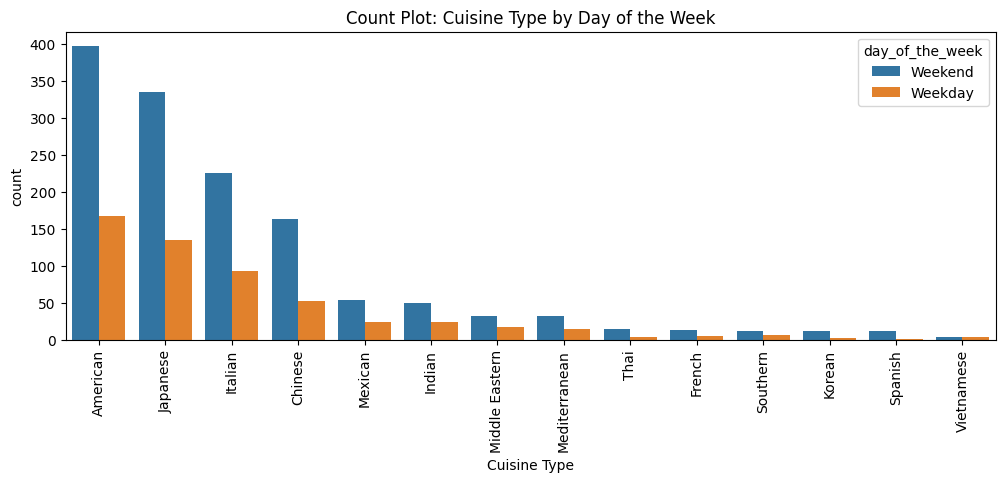

In [ ]:
# visualization plot specifying the hue parameter to display counts for
# subgroup: day of the week and in order of cuisine type counts
plt.figure(figsize=(12, 4))
plt.title('Count Plot: Cuisine Type by Day of the Week')
sns.countplot(data=df, x='cuisine_type', hue='day_of_the_week',order=df['cuisine_type'].value_counts().index)
plt.xlabel('Cuisine Type')
plt.xticks(rotation=90);


#### Observations:  The most popular cuisine on the weekends is American cuisine with 397 orders.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# filter for orders > $20
over_20_df = df[df['cost_of_the_order'] > 20]
# find percentages of order costs > $20 out of all orders
percentage_over_20 = ((over_20_df.shape[0])/(df.shape[0])) * 100
percentage_over_20


29.24130663856691

#### Observations:  Of all the orders made on the Food Hub app, 29.2% cost over $20.


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Mean value of the delivery time column
df['delivery_time'].mean()


24.161749209694417

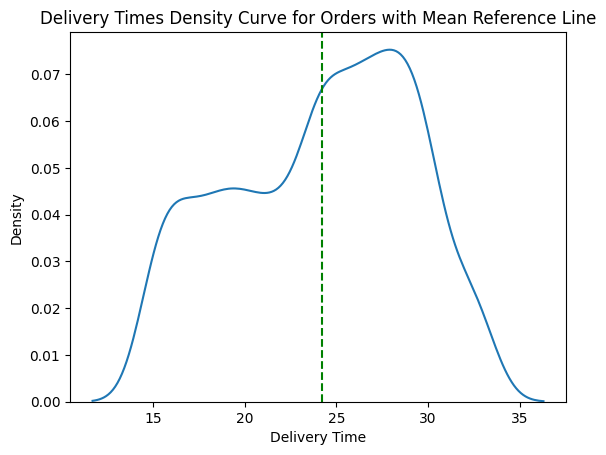

In [ ]:
# visualization by delivery time groupings
plt.title('Delivery Times Density Curve for Orders with Mean Reference Line')
lax = sns.kdeplot(data=df, x='delivery_time')
plt.axvline(x=24.2, color='g', linestyle= 'dashed')
plt.xlabel('Delivery Time')
plt.show();


#### Observations:  
The average delivery time for orders is 24.2 minutes.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# subset df created previously when exploring column 2 and creating customer ID labels
# returning top 3 values
customer_by_num_orders.head(3)

index  counts customer_id_labels
0  52832      13              > Ten
1  47440      10         Six to Ten
2  83287       9         Six to Ten

#### Observations:  
The top 3 most frequent cusomters ids are:
1. Customer ID:  52832 with 13 orders,
2. Customer ID:  47440 with 10 orders, and
3. Customer ID:  83287 with 9 orders.


# Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [ ]:
# convert 'not given' ratings to NaNs for analysis
df['rating'] = df['rating'].replace(['Not given'],np.nan)
#df.loc[df['rating'].isnull()==True] #check that rating "not given" was changed to NaN
#df.head() #check column with converted values

# change data type of ratings column to float
df['rating'] = df['rating'].astype(float)
#df.info()  #check for correctness

# create new column in dataframe of total time
df['total time'] = df['food_preparation_time'] + df['delivery_time']
df.head() #check for new column

# check for correlation among numerical variables
num_var = ['cost_of_the_order','food_preparation_time','delivery_time','rating','total time']
corr = df[num_var].corr()
corr


cost_of_the_order  food_preparation_time  \
cost_of_the_order                  1.000                  0.042   
food_preparation_time              0.042                  1.000   
delivery_time                     -0.030                  0.011   
rating                             0.034                 -0.006   
total time                         0.006                  0.686   

                       delivery_time  rating  total time  
cost_of_the_order             -0.030   0.034       0.006  
food_preparation_time          0.011  -0.006       0.686  
delivery_time                  1.000  -0.010       0.735  
rating                        -0.010   1.000      -0.011  
total time                     0.735  -0.011       1.000

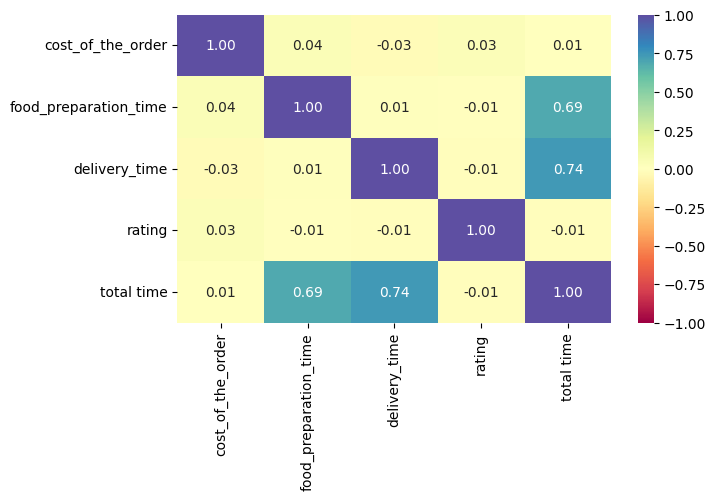

In [ ]:
# plot the heatmap
plt.figure(figsize=(7,4))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()


<Figure size 200x100 with 0 Axes>

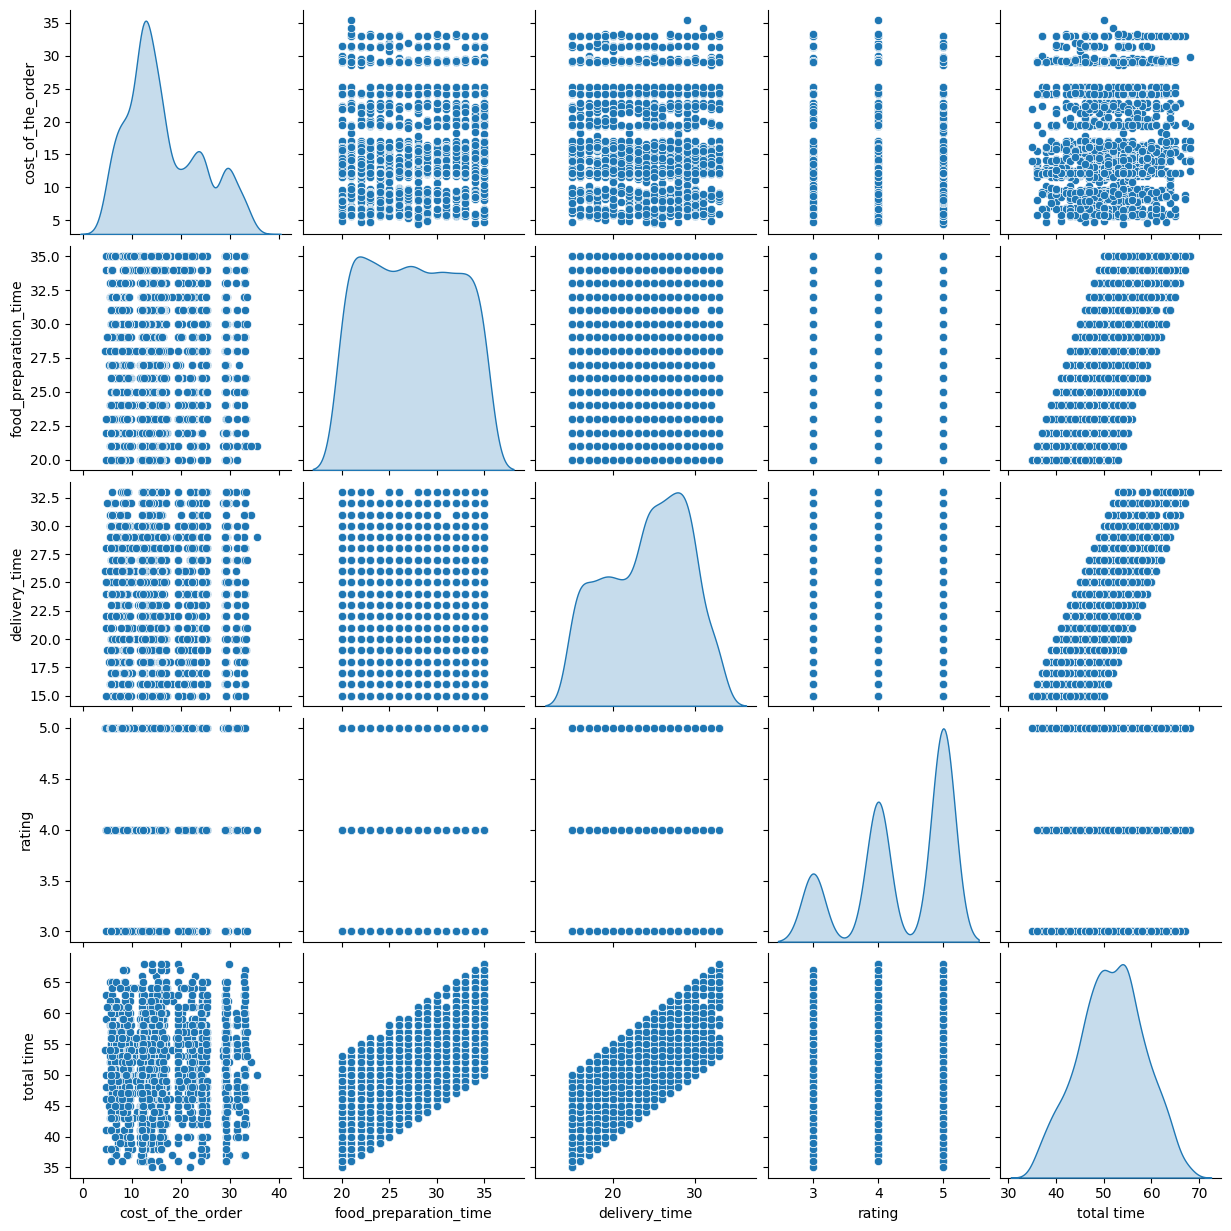

In [ ]:
# pair plot for numberic variables
plt.figure(figsize=(2, 1))
sns.pairplot(data=df[num_var], diag_kind="kde");
plt.show();


###Observations of Numeric Variables:

With the correlation matrix, heat map, and pair plots of numeric variables, there are no relationships between the cost of the order, the food preparation time, delivery time, and ratings.

There is a high correlation between total time and food preparation time and delivery time because total time is a combination of these two values.  Delivery time contributes and correlates slightly more directly to total time than food preparation time.

There is no relationship between the cost of the order and the total time (nor the food preparation time as seen above).  So the cost of the order, which might indicate how much food is ordered, is not impacting the time it takes to get the order to the customer. (Other factors could be impacting the cost of the order, such as the prices of the different restaurants, rather than the amount of food ordered.)

#Total Time with other Variables

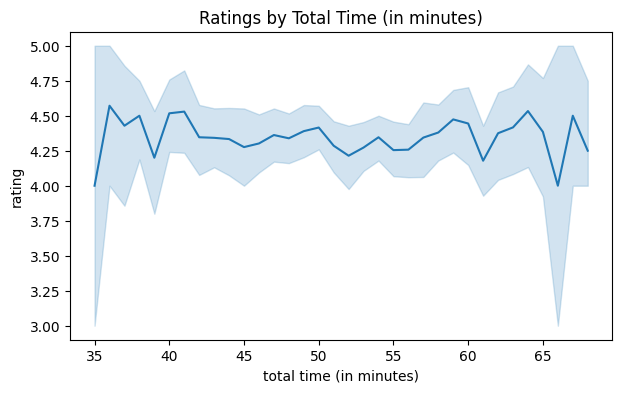

In [ ]:
# visualize if there is a relationship between total time and rating
plt.figure(figsize=(7,4))
plt.title('Ratings by Total Time (in minutes)')
sns.lineplot(data=df,x='total time',y='rating')
plt.xlabel('total time (in minutes)')
plt.ylabel('rating')
plt.show();


###Observations of Total Time and Rating:
There is no relationship between the total time and the rating, just as there was no relationship between the 2 components of total time (food preparation time and delivery time) and the rating.  So the total time it takes for a customer to order the food and have it delivered does not impact how the customer makes a rating.

Other factors could be impacting the ratings given by the customer, or several factors combined.  Factors that could impact rating could be app functionality, food quality, convenience, and costs.  Some of these factors are not provided by this dataset and beyond the scope, and we have already seen above there is no correlation between the cost and the rating.

There may be more information that could be obtained with more customers rating their order.  Perhaps incentives could be implemented so more rating data can be obtained from customers.

*************************************


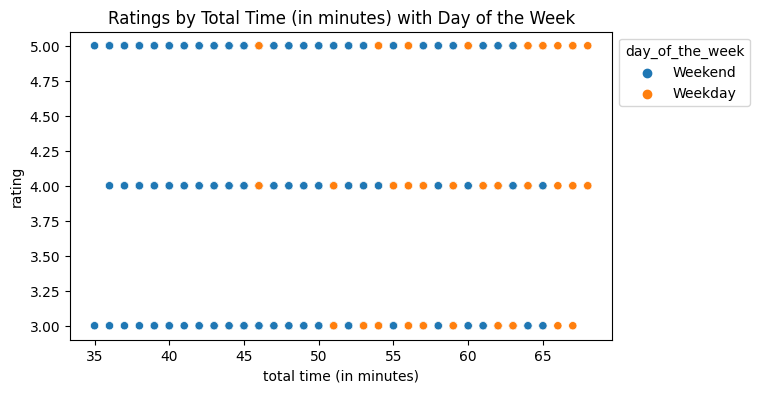

In [ ]:
# visualize if there is a relationship between total time and rating with day of week
plt.figure(figsize=(7,4))
plt.title('Ratings by Total Time (in minutes) with Day of the Week')
plt.xlabel('total time (in minutes)')
plt.ylabel('rating')
ax=sns.scatterplot(data = df, x = 'total time', y = 'rating', hue='day_of_the_week')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1));

# reference for legend move code:  https://seaborn.pydata.org/generated/seaborn.move_legend.html

###Observations of Total Time, Rating, and Day of the Week:  
Looking at the total time and rating with the day of the week, we do not see any relationship between how long the order takes to arrive to the customer and the ratings.  We can also see there may be some insights related to the total time and the day of the week.  The weekday points appear more concentrated over the 50 minutes of total time and the weekend points are more concentrated under 55 minutes total time.  We will look futher below.

#Day of the Week and Other Variables

<Figure size 200x100 with 0 Axes>

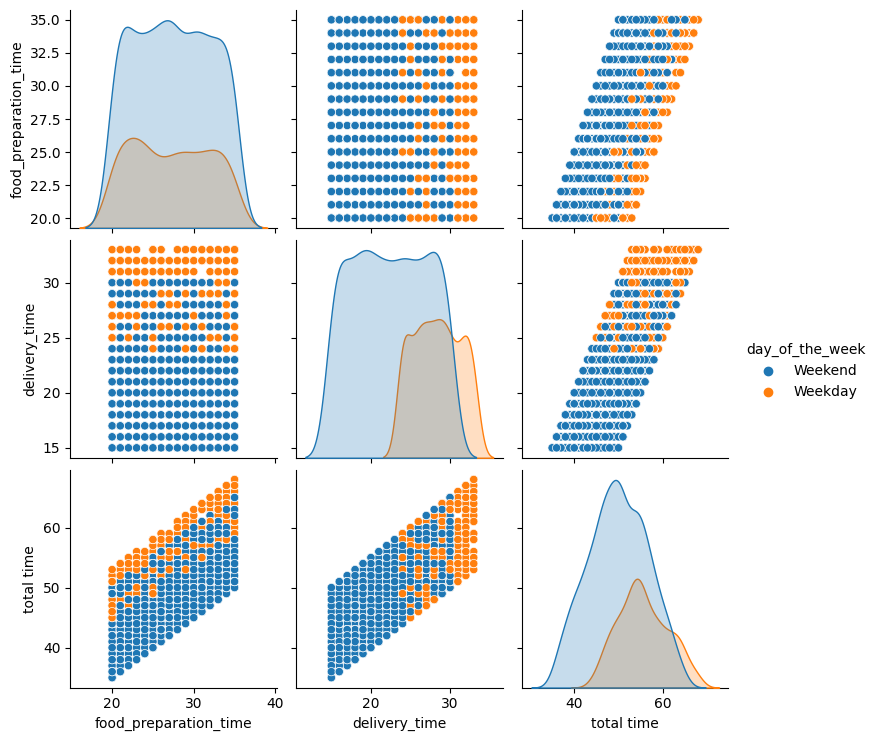

In [ ]:
# pair plot for numeric variables with day of the week
plt.figure(figsize=(2, 1))
sns.pairplot(data=df, vars=['food_preparation_time','delivery_time','total time'], hue='day_of_the_week');
plt.show();


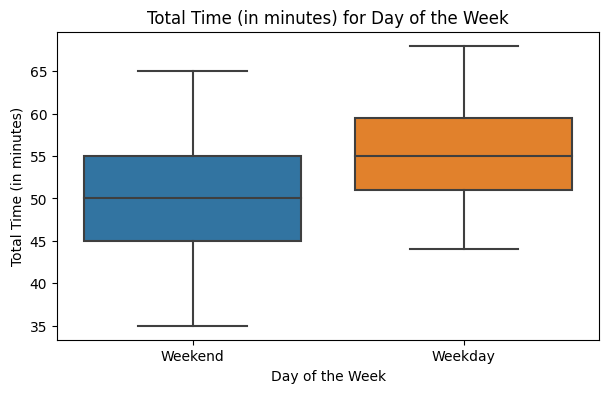

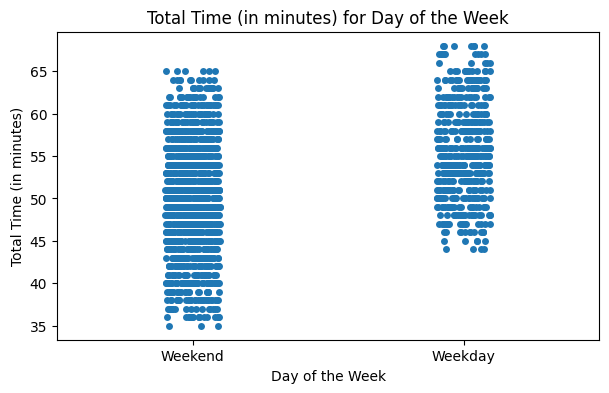

In [ ]:
# visualization of comparison between total time and day of week
plt.figure(figsize=(7,4))
plt.title('Total Time (in minutes) for Day of the Week')
sns.boxplot(data=df, x='day_of_the_week', y='total time')
plt.xlabel('Day of the Week')
plt.ylabel('Total Time (in minutes)')
plt.show();

plt.figure(figsize=(7,4))
plt.title('Total Time (in minutes) for Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Time (in minutes)')
sns.stripplot(data=df, x='day_of_the_week', y='total time',jitter=True);
plt.show();


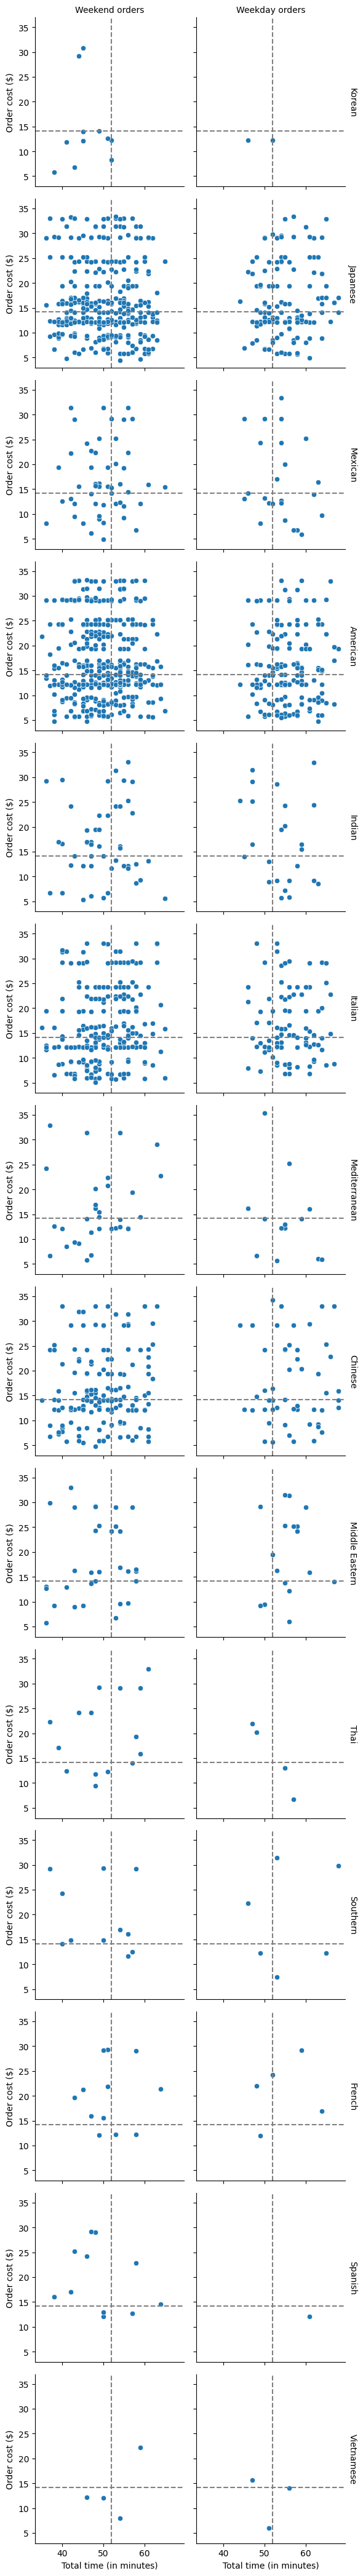

In [ ]:
# visualize types of cuisine and day of the week by cost of the order and total time
g = sns.FacetGrid(df, col='day_of_the_week', row='cuisine_type', margin_titles=True)
g.map_dataframe(sns.scatterplot, x='total time', y='cost_of_the_order');
g.refline(x=df['total time'].median(), y=df['cost_of_the_order'].median())
g.set_axis_labels('Total time (in minutes)', 'Order cost ($)')
g.set_titles(col_template='{col_name} orders', row_template="{row_name}")
g.tight_layout();


#reference for code:  https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

A facet grid representing multiple dimensions of orders made on the Food Hub app:
* total time in minutes (with median line),
* order cost ($) (with median line),
* by day of the week, and
* by type of cuisine.

Scrolling through the small graphics of the dataset, we are able to visualize all the orders on the dataset by these different attributes.  It becomes more apparent that certain cuisines, have more orders as well as days of the week.  The range of order costs and total time for the customers to receive their order are also observable.

We will continue by looking at food preparation time.  More observations below.

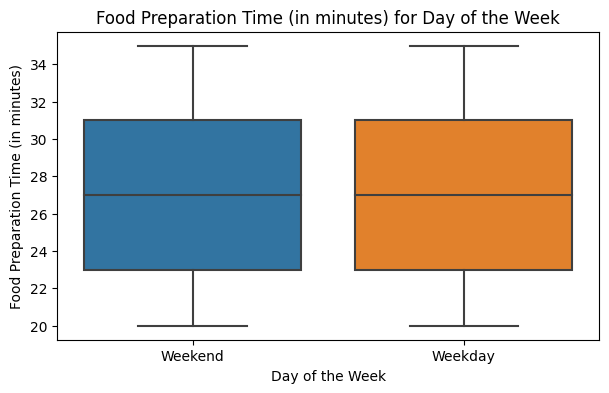

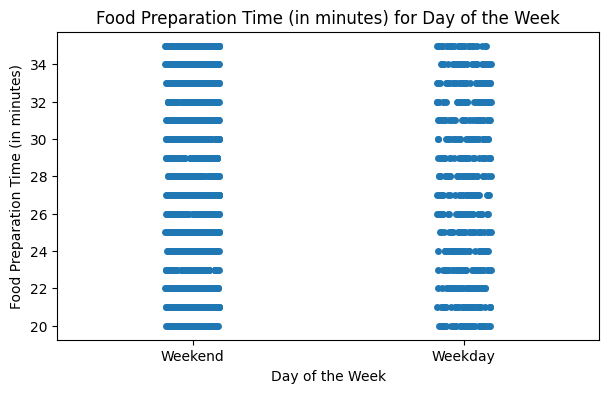

In [ ]:
# visualization of comparison between between food preparation time and day of week
plt.figure(figsize=(7,4))
plt.title('Food Preparation Time (in minutes) for Day of the Week')
sns.boxplot(data=df, x='day_of_the_week', y='food_preparation_time')
plt.xlabel('Day of the Week')
plt.ylabel('Food Preparation Time (in minutes)')
plt.show();

plt.figure(figsize=(7,4))
plt.title('Food Preparation Time (in minutes) for Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Food Preparation Time (in minutes)')
sns.stripplot(data=df, x='day_of_the_week', y='food_preparation_time',jitter=True);
plt.show();


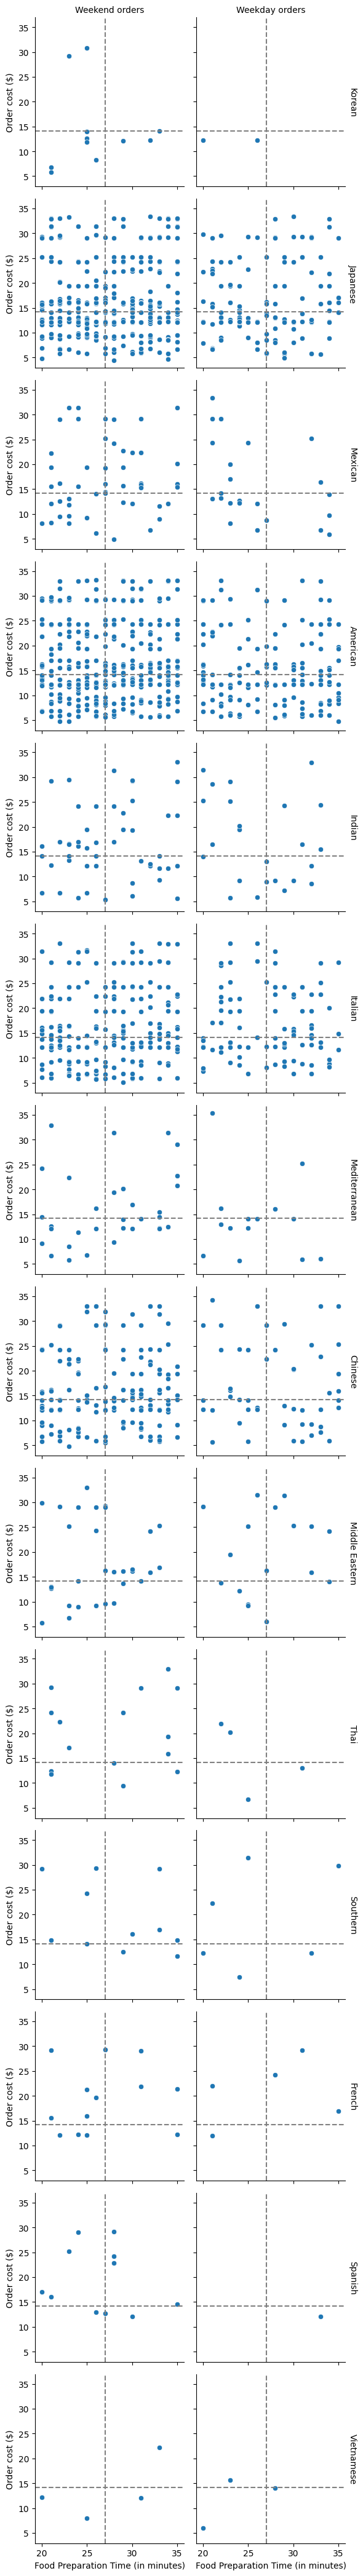

In [ ]:
# visualize types of cuisine and day of the week by cost of the order and food preparation time
g = sns.FacetGrid(df, col='day_of_the_week', row='cuisine_type', margin_titles=True)
g.map_dataframe(sns.scatterplot, x='food_preparation_time', y='cost_of_the_order');
g.refline(x=df['food_preparation_time'].median(), y=df['cost_of_the_order'].median())
g.set_axis_labels('Food Preparation Time (in minutes)', 'Order cost ($)')
g.set_titles(col_template='{col_name} orders', row_template="{row_name}")
g.tight_layout();

#reference for code:  https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

A facet grid representing multiple dimensions of orders made on the Food Hub app:
* food preparation time in minutes (with median line),
* order cost ($) (with median line),
* by day of the week, and
* by type of cuisine.

Scrolling through the small graphics of the dataset, we are able to visualize all the orders on the dataset by these different attributes.  It becomes more apparent that certain cuisines, have more orders as well as days of the week.  The range of order costs and food preparation time for orders are also observable.

We will continue by looking at delivery time.  More observations below.

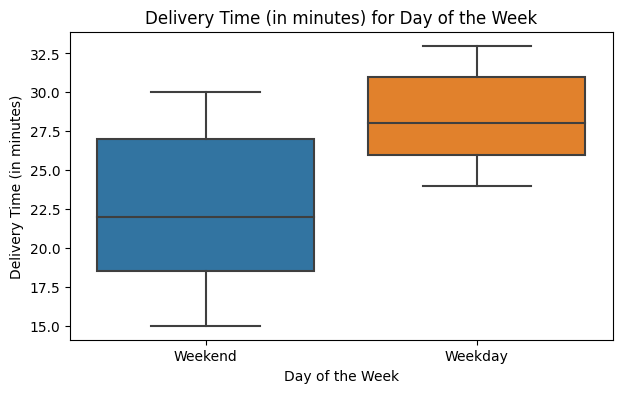

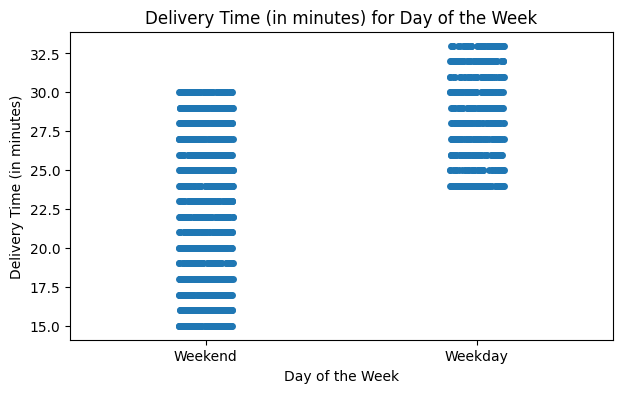

In [ ]:
# visualization of comparison between between delivery time and day of week
plt.figure(figsize=(7,4))
plt.title('Delivery Time (in minutes) for Day of the Week')
sns.boxplot(data=df, x='day_of_the_week', y='delivery_time')
plt.xlabel('Day of the Week')
plt.ylabel('Delivery Time (in minutes)')
plt.show();

plt.figure(figsize=(7,4))
plt.title('Delivery Time (in minutes) for Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Delivery Time (in minutes)')
sns.stripplot(data=df, x='day_of_the_week', y='delivery_time',jitter=True);
plt.show();


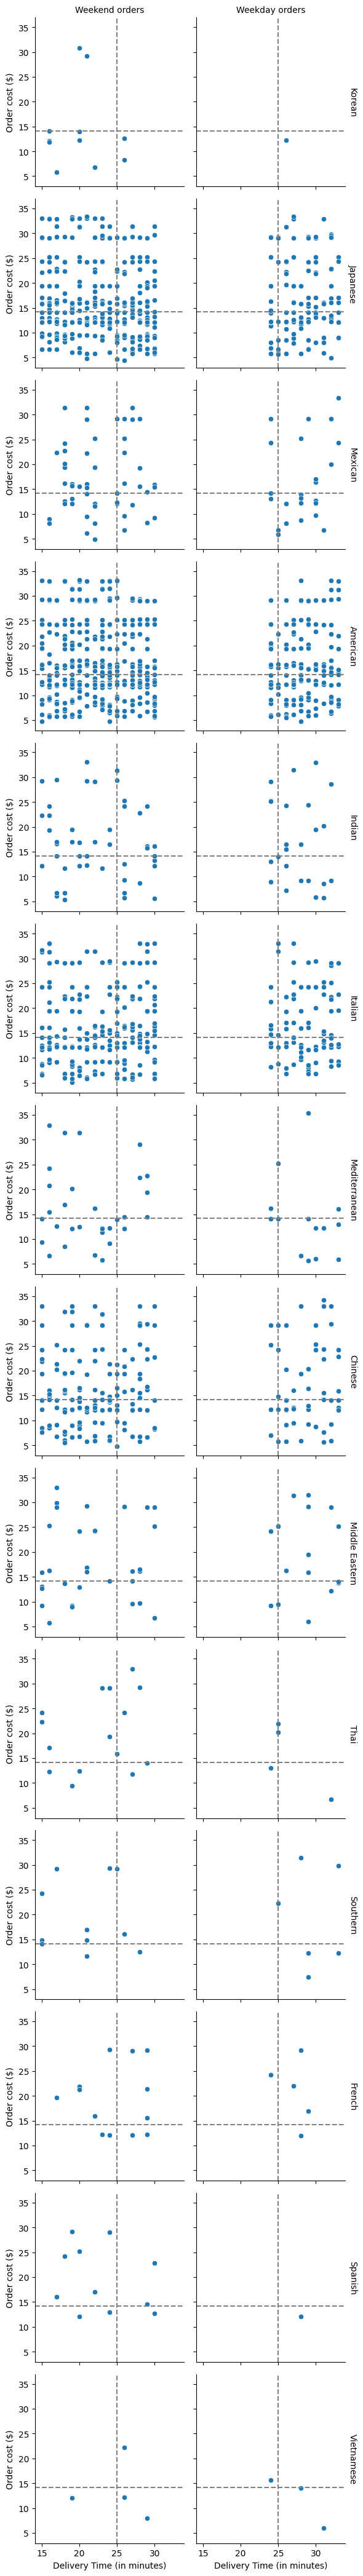

In [ ]:
# visualize types of cuisine and day of the week by cost of the order and total time
g = sns.FacetGrid(df, col='day_of_the_week', row='cuisine_type', margin_titles=True)
g.map_dataframe(sns.scatterplot, x='delivery_time', y='cost_of_the_order');
g.refline(x=df['delivery_time'].median(), y=df['cost_of_the_order'].median())
g.set_axis_labels('Delivery Time (in minutes)', 'Order cost ($)')
g.set_titles(col_template='{col_name} orders', row_template="{row_name}")
g.tight_layout();

#reference for code:  https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

A facet grid representing multiple dimensions of orders made on the Food Hub app:
* delivery time in minutes (with median line),
* order cost ($) (with median line),
* by day of the week, and
* by type of cuisine.

Scrolling through the small graphics of the dataset, we are able to visualize all the orders on the dataset by these different attributes.  It becomes more apparent that certain cuisines, have more orders as well as days of the week.  The range of order costs and delivery time for orders are also observable.

We will continue by looking at times for a more detailed view of the the different types of cuisine.

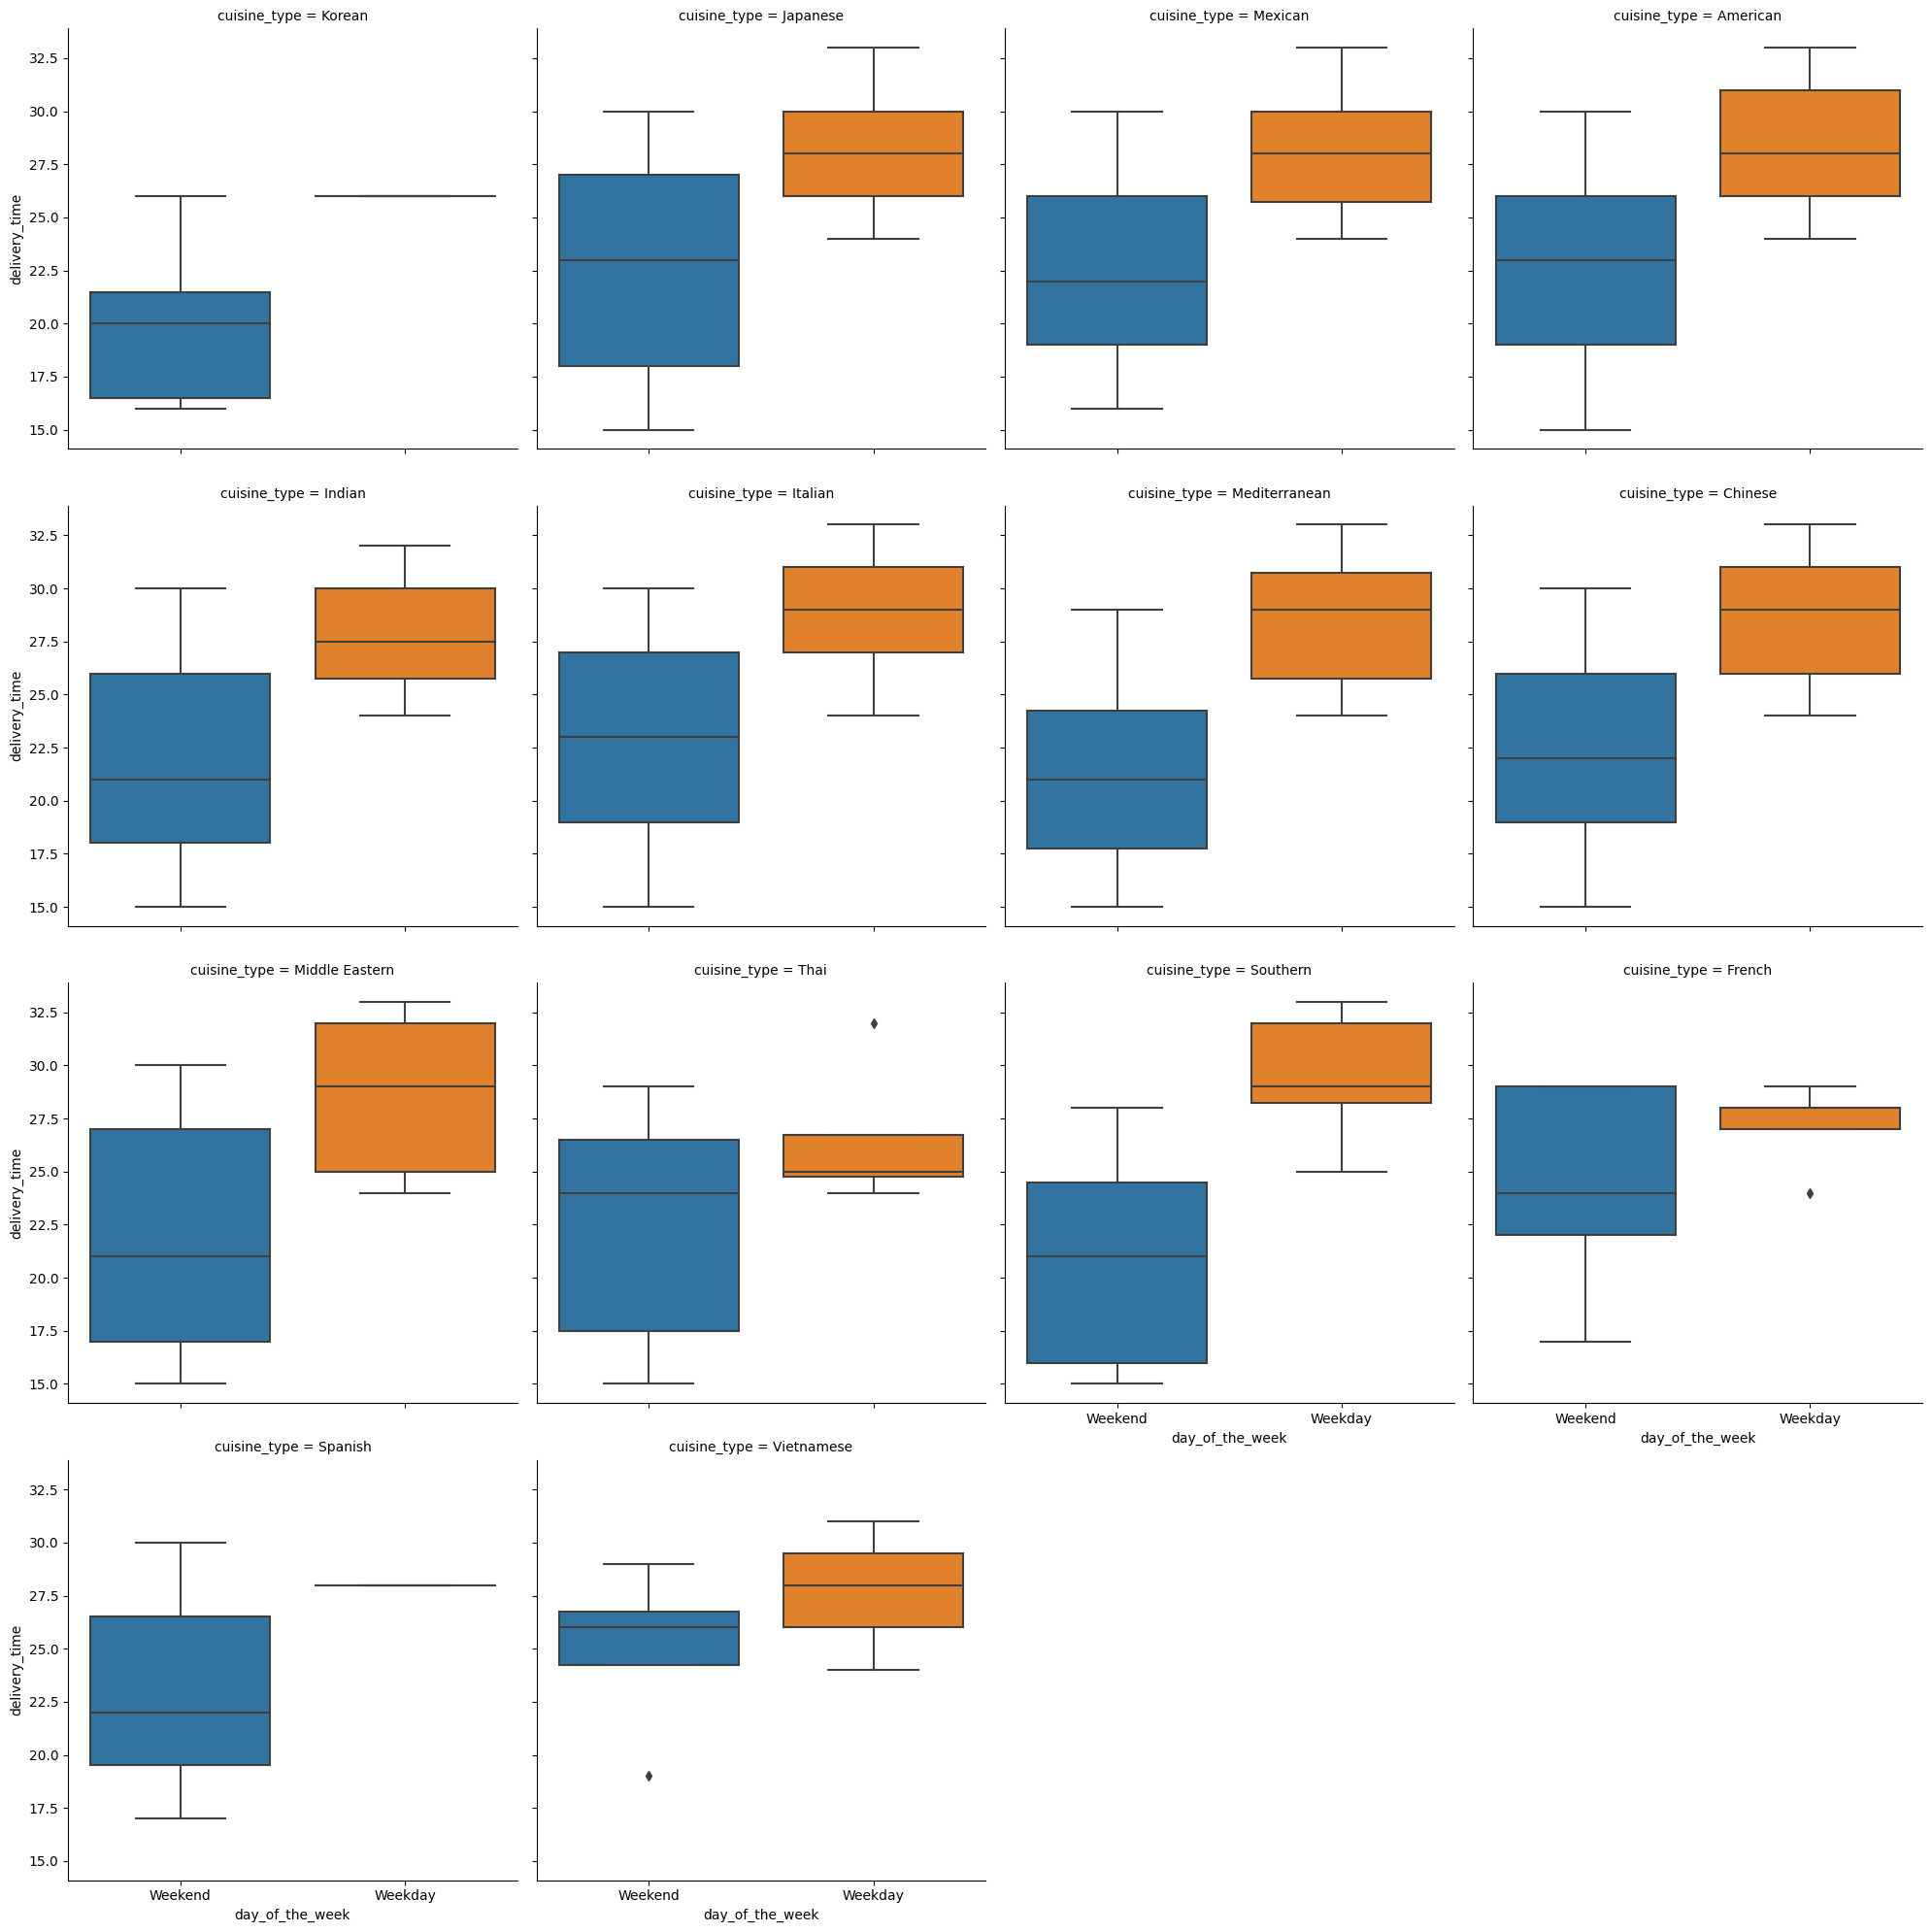

In [ ]:
# multivariate visualization delivery time by cuisine and by the day of the week
sns.catplot(x='day_of_the_week', y='delivery_time', data=df,
                estimator=sum, col='cuisine_type', kind='box',
              col_wrap = 4)
plt.show();


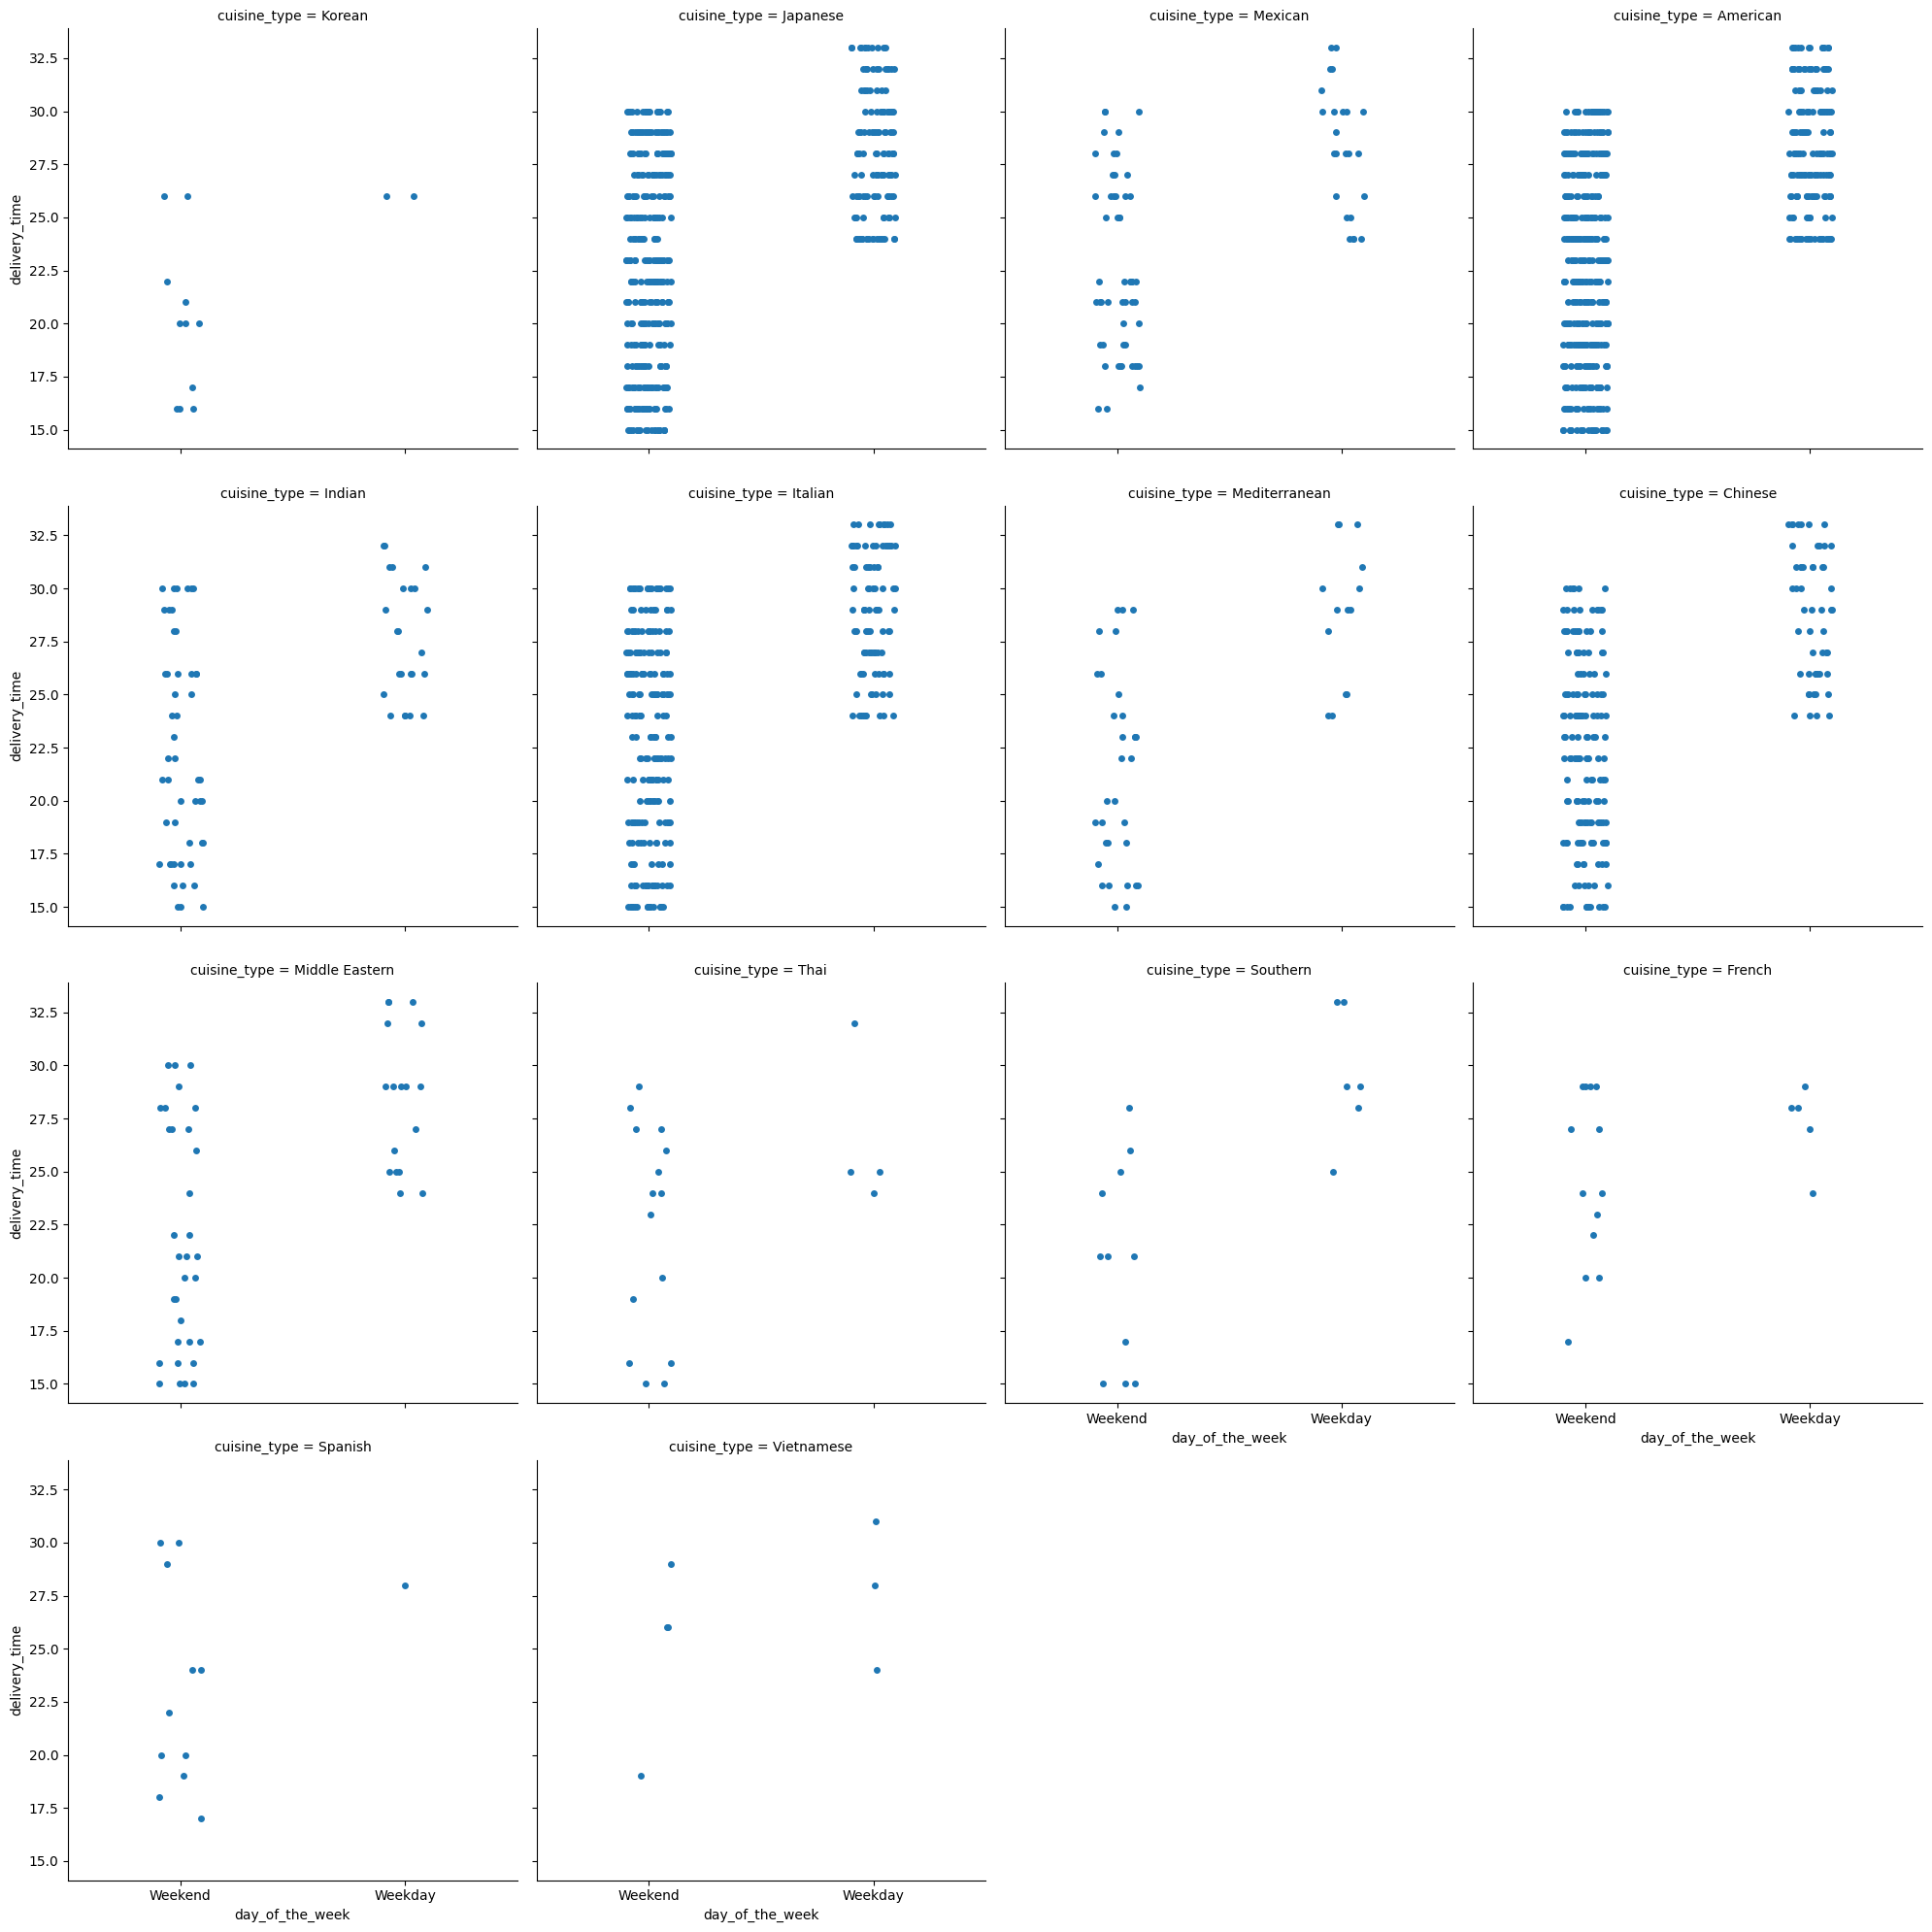

In [ ]:
# multivariate visualization delivery time by cuisine and by the day of the week
sns.catplot(x='day_of_the_week', y='delivery_time', data=df,
                estimator=sum, col='cuisine_type', kind='strip',
              col_wrap = 4);
plt.show();

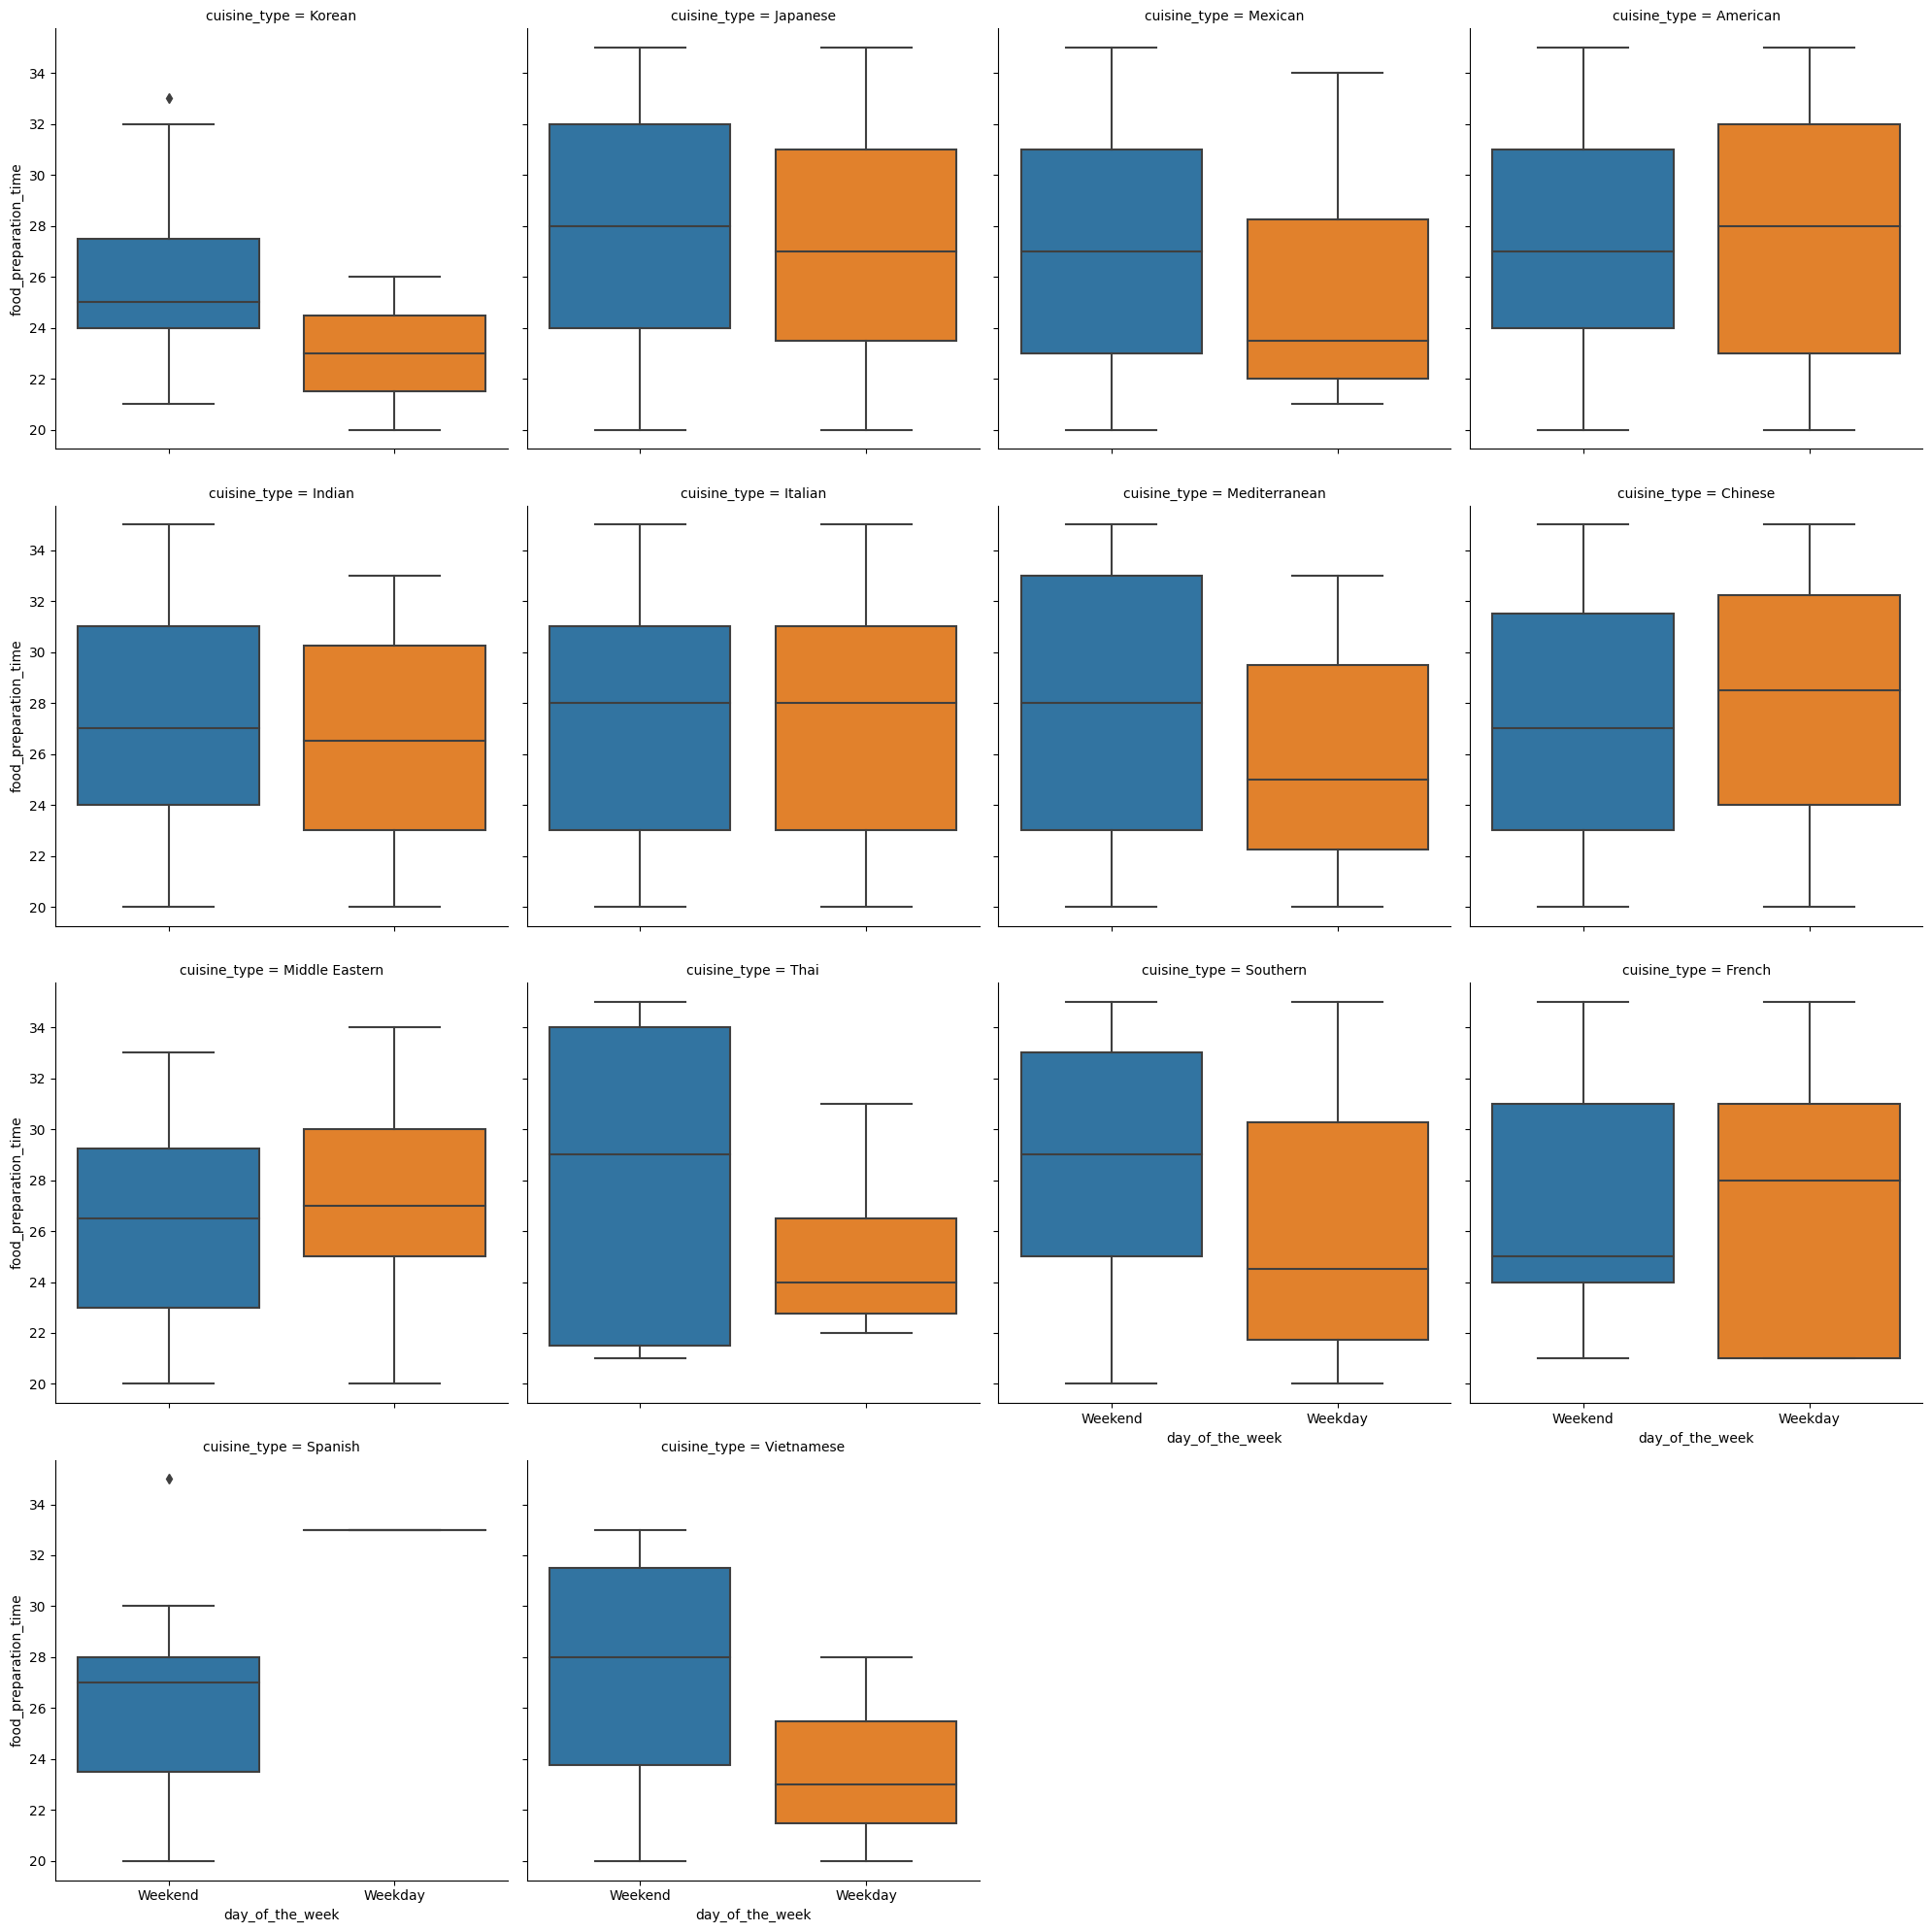

In [ ]:
# multivariate visualization food preparation time by cuisine and by the day of the week
sns.catplot(x='day_of_the_week', y='food_preparation_time', data=df,
                estimator=sum, col='cuisine_type', kind='box',
              col_wrap = 4);
plt.show();


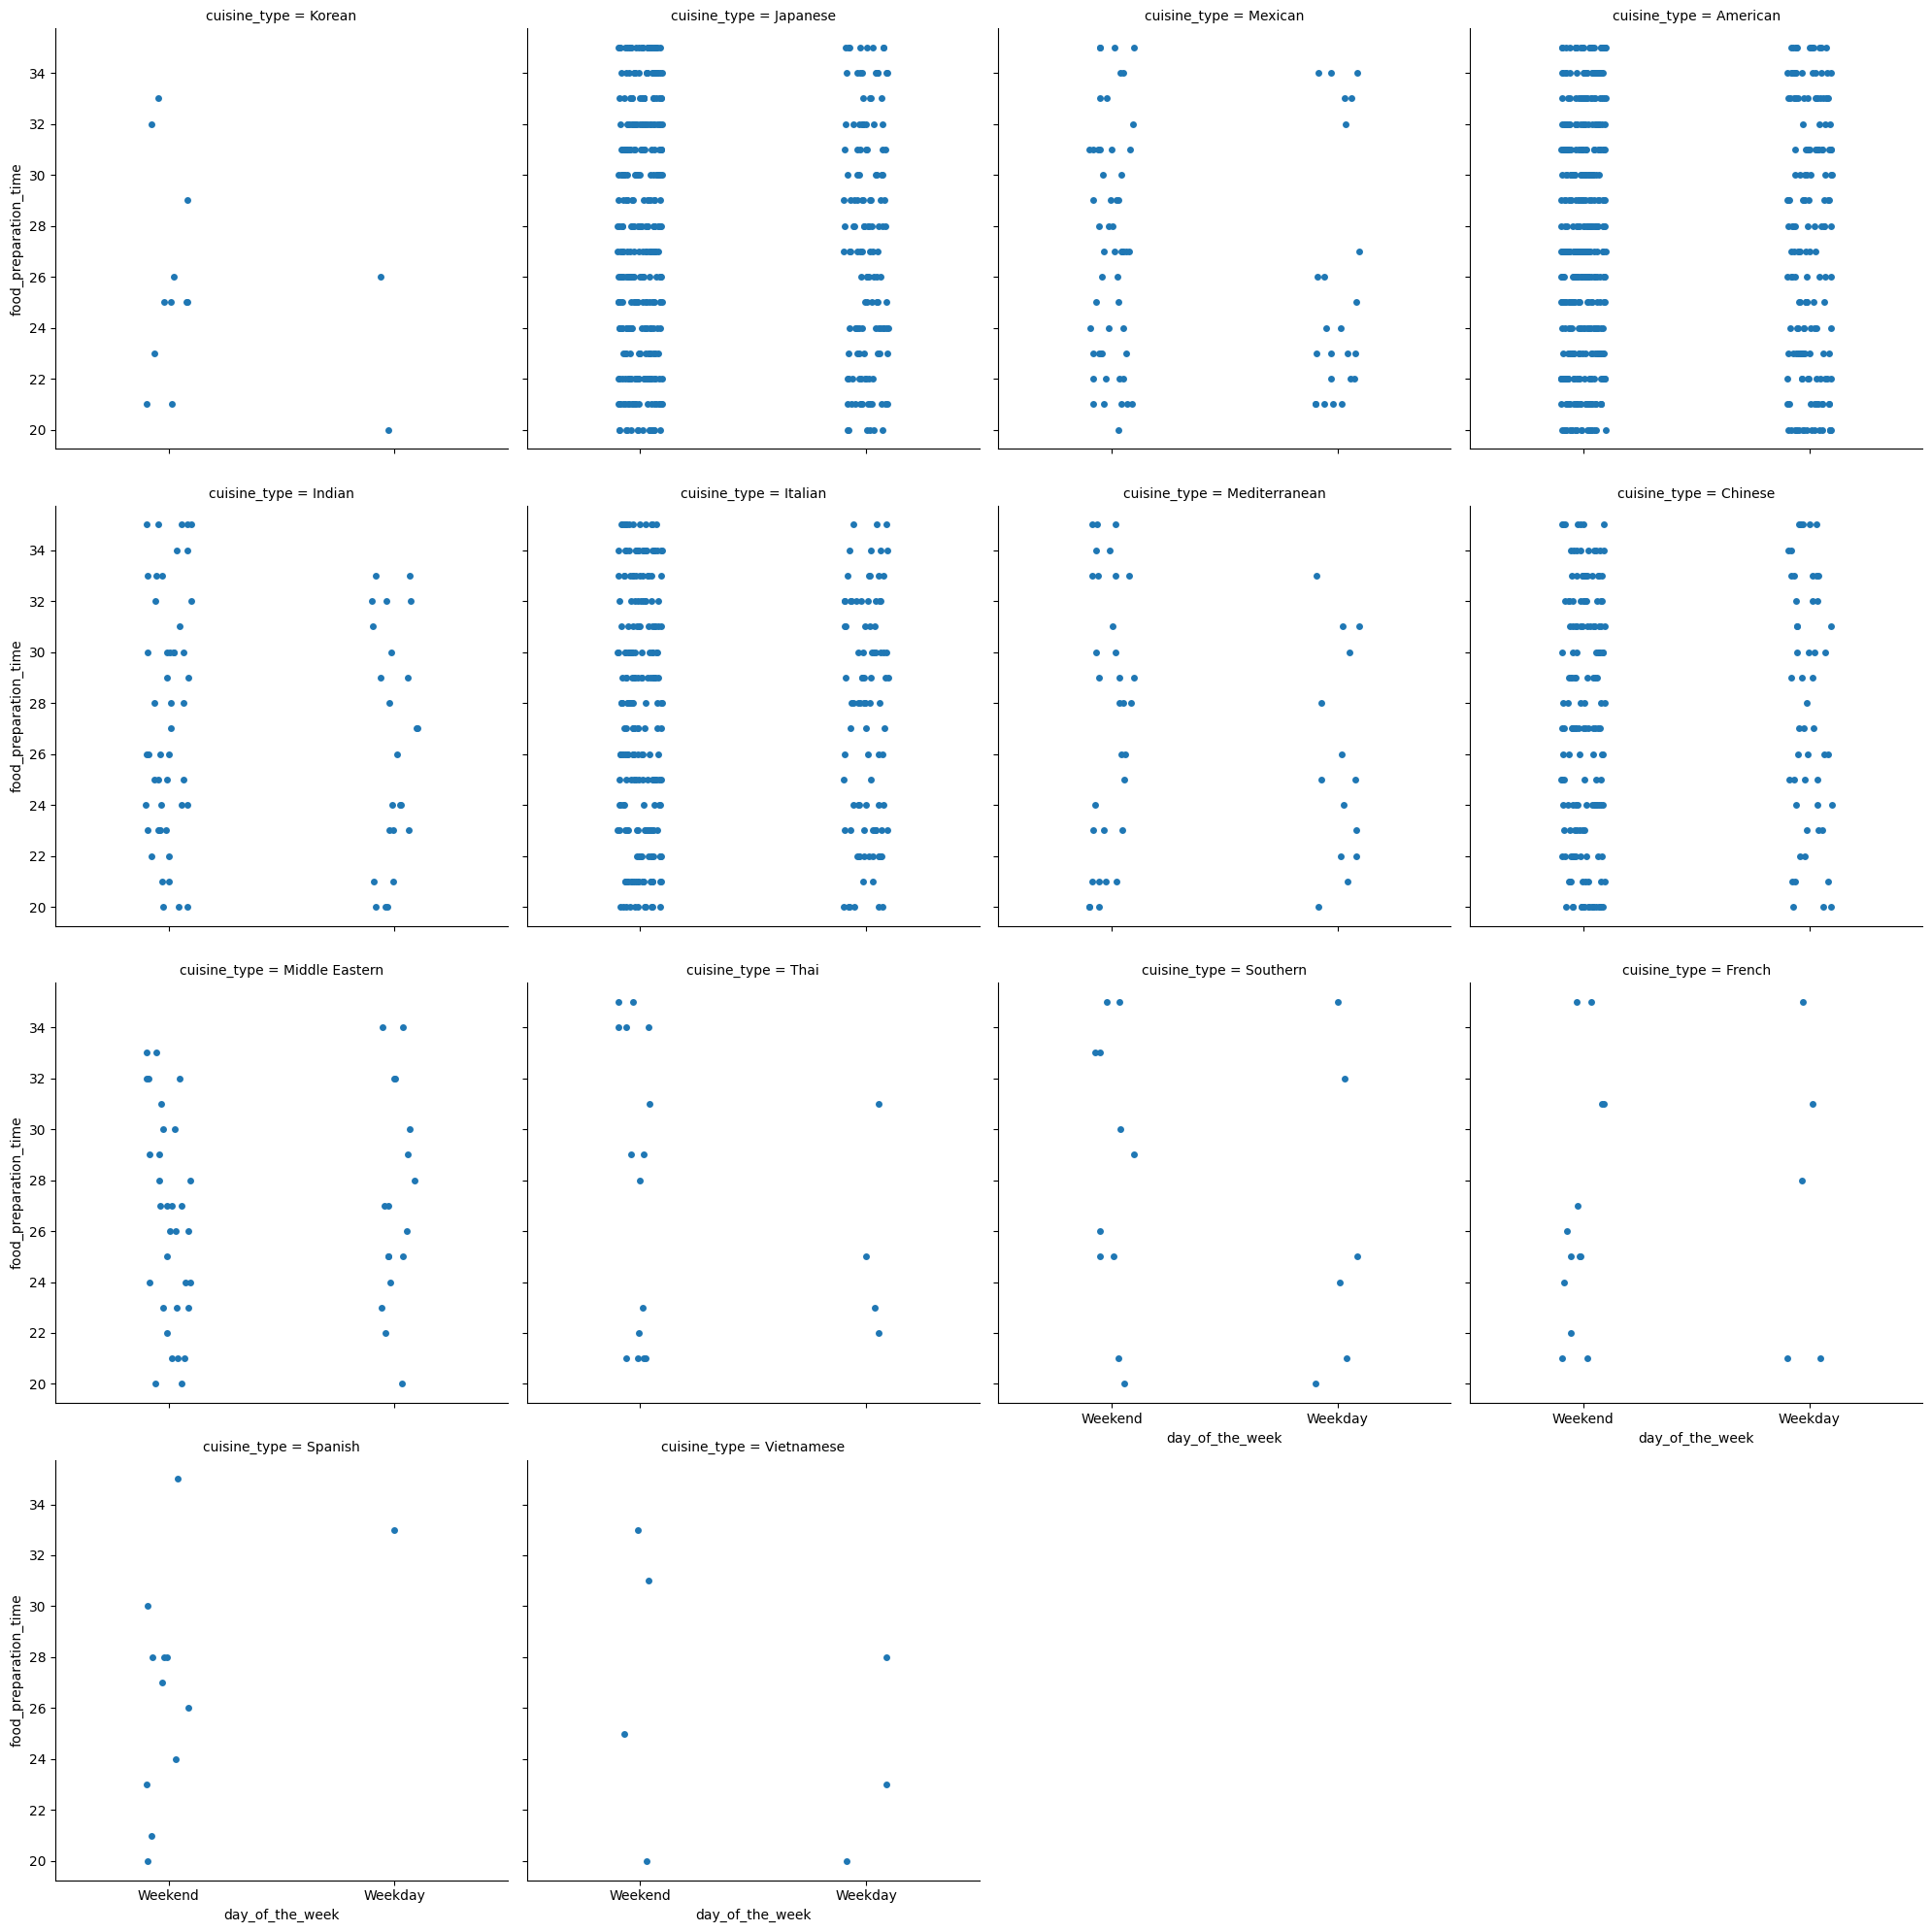

In [ ]:
# multivariate visualization food preparation time by cuisine and by the day of the week
sns.catplot(x='day_of_the_week', y='food_preparation_time', data=df,
                estimator=sum, col='cuisine_type', kind='strip',
              col_wrap = 4);
plt.show();

###Observations of Day of Week and Delivery Time:
Looking at the Day of the Week variable, we did analysis with the Total Time, Food Preparation Time, and the Delivery Time.  (Total Time is a composite of Delivery Time and Food Preparation Time.)  

As is seen in the pairplot above, a more dramatic distinction appears in terms of comparing the day of the week and the time it takes for the customer to receive their order.

The delivery time is shorter on weekend days that on weekdays.  Even exploring different cuisine types using multivariate analysis, we can see the pattern continue.  All median delivery times are shorted on weekend days for all cuisine types.

There are fewer orders during the week days, but the delivery time is longer.

Since the company that provides the Food Hub app also supplies the delivery drivers, it is a variable that the FoodHub company can have a direct impact on.

Next, we will look at Food Preparation Time and Types of Cuisine and continue exploring the Day of the Week variable.

###Observations of Day of Week and Food Preparation Time:

The food preparation time looks about equal when looking at the box plot median values for weekend and weekdays.  However, continuing with a multivariate analysis looking at the food preparation times with day of the week and types of cuisine considered, there is variation in the Food Prepration Times and the consistent trend we saw in Delivery Times above do not persist in Food Preparation Time.  The following variety is observed when looking at the different types of cuisine on different days of the week.

* Italian food has equal median Food Preparation Time for Weekends and Weekdays.

* Cuisines that have faster median Food Preparation times on Weekends are:
 * American, Chinese, Middle Eastern, French, and Spanish.

* The other cuisines with faster median Food Preparation times on Weekdays are:
 *  Korean, Japanese, Mexican, Indian, Mediterranean, Thai, Southern, and Vietnamese

Since the business question seeks to get an idea of demand of different restaurants to enhance the customer experience, these observations could provide insightful information so restarants can adjust staffing to meet food preparation needs for different cuisine types on different days of the week and Food Hub can consider different options to speed delivery times on weekdays.






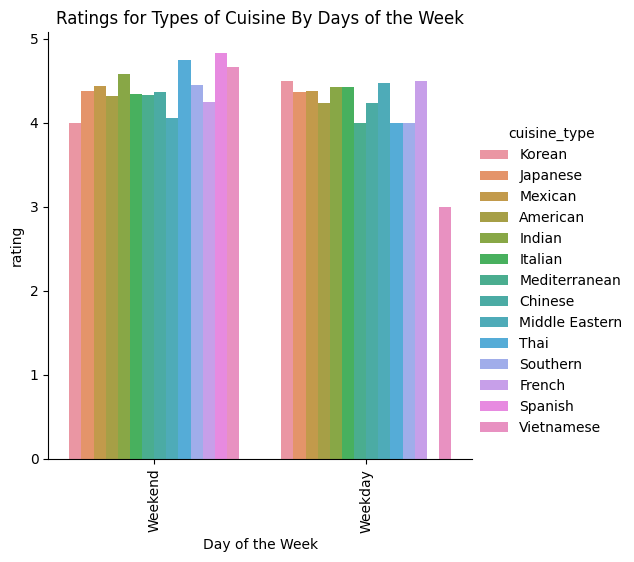

In [ ]:
# visualize Type of Cuisine and Ratings by Day of the Week
sns.catplot(x='day_of_the_week', y='rating', data=df, hue='cuisine_type',kind="bar", errorbar=None)
plt.title('Ratings for Types of Cuisine By Days of the Week')
plt.xlabel('Day of the Week')
plt.xticks(rotation=90);
plt.show();


###Observations of Day of the Week and Ratings by Cuisine:
Ratings do not appear to vary greatly when visualized by type of cuisine and for the day of the week.  The Vietnamese cuisine, however, has the lowest rating on the weekday of all cuisines and of all days of the week.  There is also no ratings for Spanish cuisine on week days.
* Korean, Middle Eastern, French cuisine has lower average ratings on weekends than week days.
* Southern, Mediterranean, Indian, American, and Thai cuisines have a lower average ratings on week days than weekends.

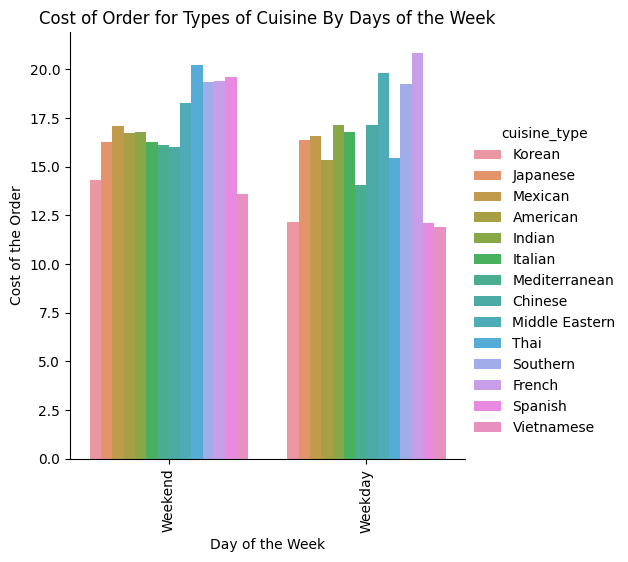

In [ ]:
# visualize Type of Cuisine and Cost by Day of the Week
sns.catplot(x='day_of_the_week', y='cost_of_the_order', data=df, hue='cuisine_type',kind="bar", errorbar=None)
plt.title('Cost of Order for Types of Cuisine By Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Cost of the Order')
plt.xticks(rotation=90);
plt.show();


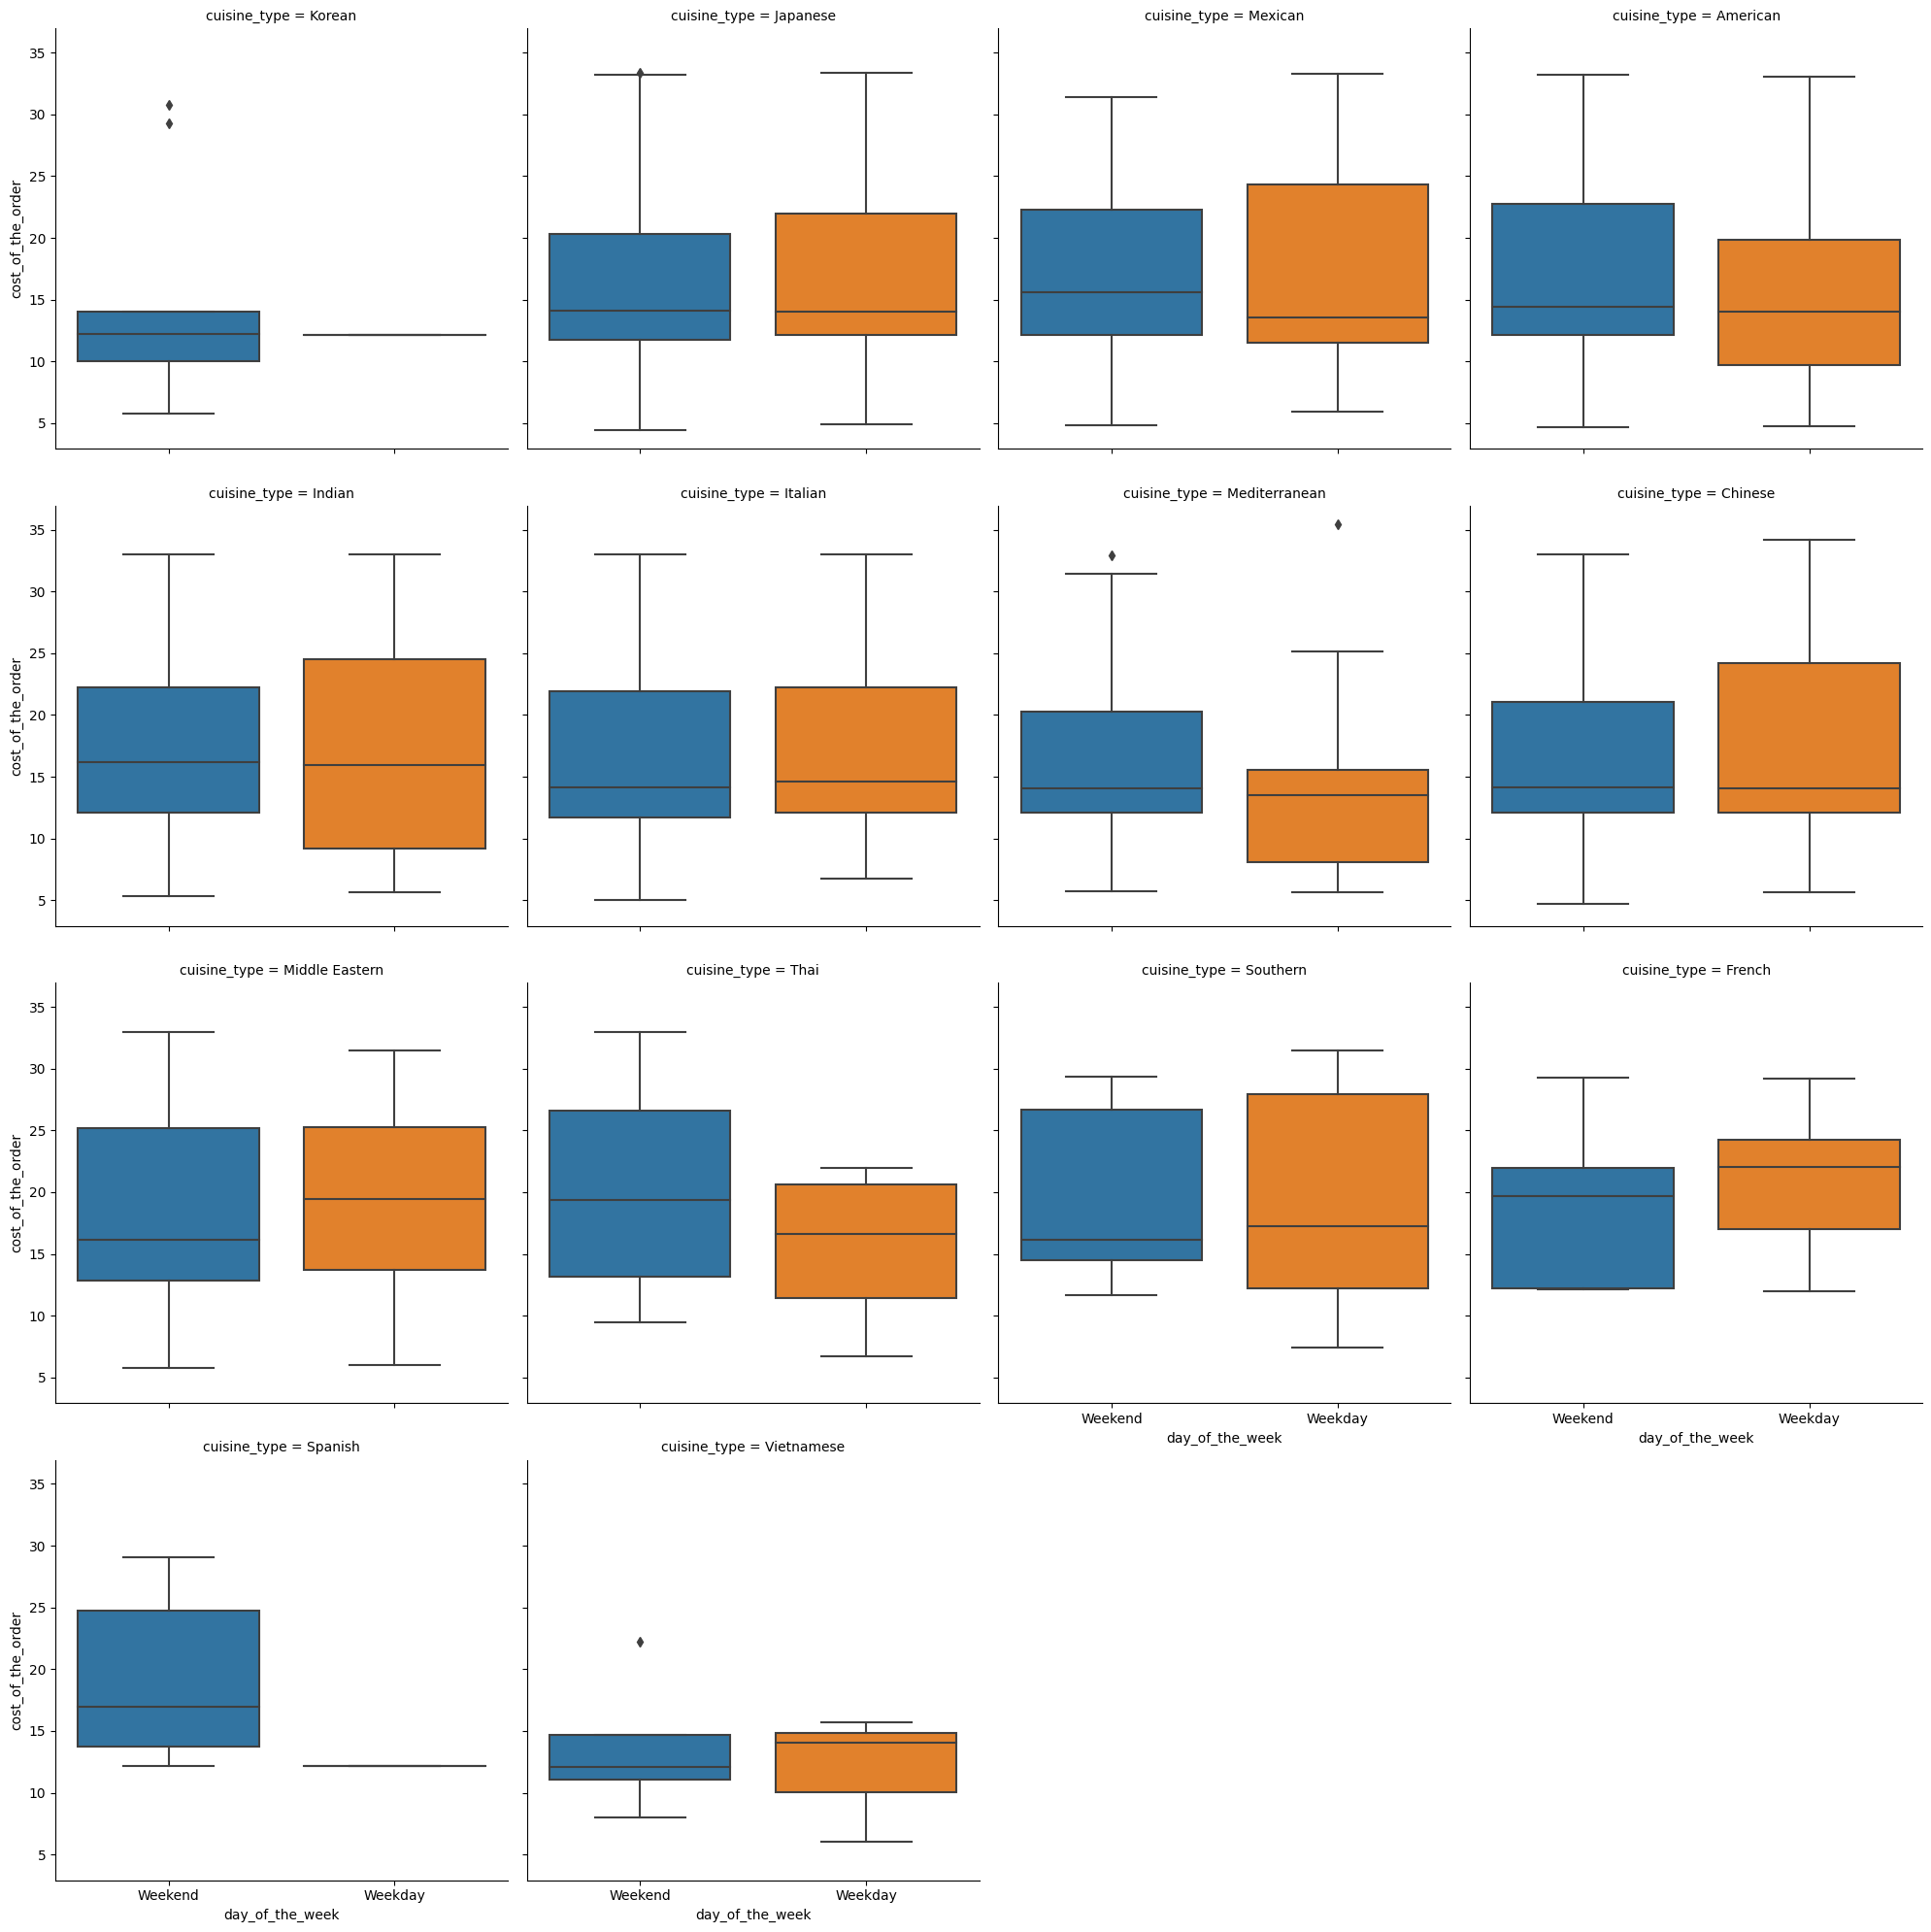

In [ ]:
# visualization of cost of order by the day of the week and type of cuisine
sns.catplot(x='day_of_the_week', y='cost_of_the_order', data=df,
                estimator=sum, col='cuisine_type', kind='box',
              col_wrap = 4);
plt.show();


###Observations of Day of the Week and Cost of the Order by Cuisine:
Order costs vary by types of cuisine as well as by day of the week for some cuisines.  
* Though ranges vary, the median for order cost are about equal for the following cuisines on any day of the week:
 * Korean, Japanese, American, Indian, Italian, and Chinese.
* Weekends have higher medians order costs for the following cuisines:
 * Mexican, Mediterranean,Thai, and Spanish.
* Week days have higher median order costs for the following cuisines:
 * Middle Eastern, Southern, French, and Vietnamese.

#Types of Cuisine and Rating

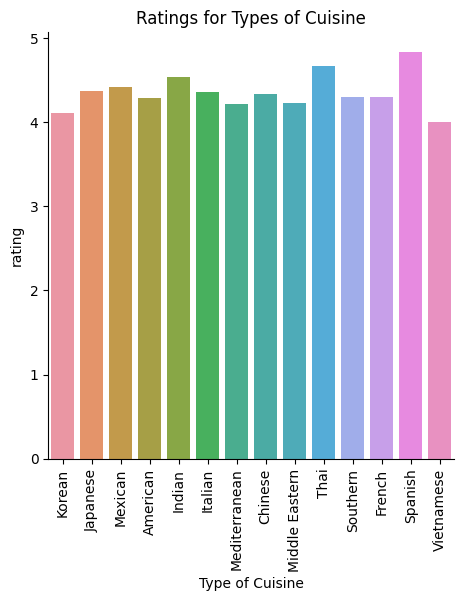

In [ ]:
# visualize Type of Cuisine and Ratings
sns.catplot(x='cuisine_type', y='rating', data=df, kind="bar",errorbar=None);
plt.title('Ratings for Types of Cuisine')
plt.xlabel('Type of Cuisine')
plt.xticks(rotation=90)
plt.show()


###Observations:
Here we see a bivariate analysis of the ratings by different cuisine types.  The highest average rating is for Spanish cuisine and the lowest average rating is for Vietnamese cuisine.

#Details about Top Customers (by number of orders)

In [ ]:
# get more information about customer with more than 10 orders
over_10_df # get customer id for this dataframe subset to locate more details in larger dataframe

num_1_customer = df.loc[df['customer_id']==52832]
#num_1_customer # check for corectness

In [ ]:
num_1_customer.describe().T

count        mean     std         min         25%  \
order_id              13.000 1477434.308 556.506 1476828.000 1477041.000   
customer_id           13.000   52832.000   0.000   52832.000   52832.000   
cost_of_the_order     13.000      17.369   8.066       6.640      12.230   
rating                 7.000       4.143   0.900       3.000       3.500   
food_preparation_time 13.000      27.769   4.711      21.000      23.000   
delivery_time         13.000      24.692   4.289      17.000      21.000   
total time            13.000      52.462   5.333      40.000      50.000   

                              50%         75%         max  
order_id              1477179.000 1478160.000 1478265.000  
customer_id             52832.000   52832.000   52832.000  
cost_of_the_order          15.860      24.200      31.430  
rating                      4.000       5.000       5.000  
food_preparation_time      28.000      32.000      35.000  
delivery_time              25.000      28.000      30.000  
total time                 52.000      55.000      60.000

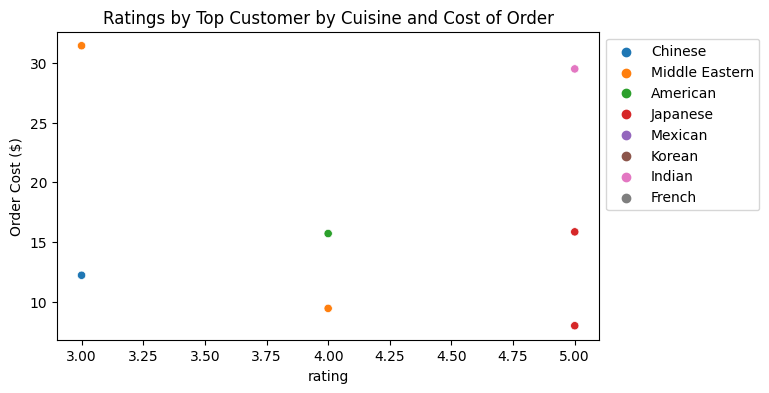

In [ ]:
plt.figure(figsize=(7,4))
plt.title('Ratings by Top Customer by Cuisine and Cost of Order')
sns.scatterplot(data=num_1_customer, x='rating', y='cost_of_the_order', hue='cuisine_type');
plt.ylabel('Order Cost ($)');
plt.legend(bbox_to_anchor=(1, 1));

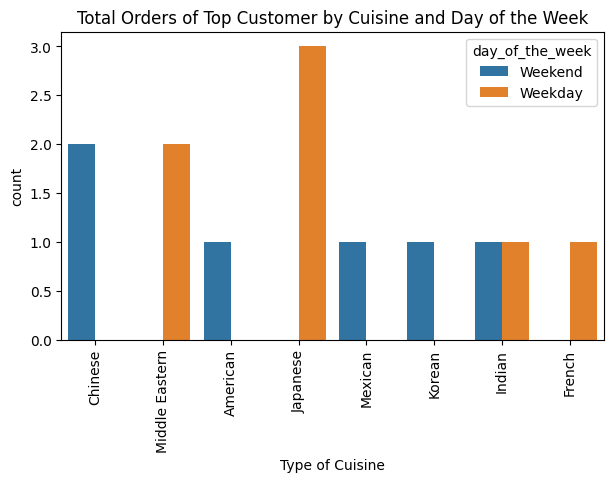

In [ ]:
plt.figure(figsize=(7,4))
plt.title('Total Orders of Top Customer by Cuisine and Day of the Week')
sns.countplot(data=num_1_customer, x='cuisine_type', hue='day_of_the_week');
plt.xlabel('Type of Cuisine')
plt.xticks(rotation=90);

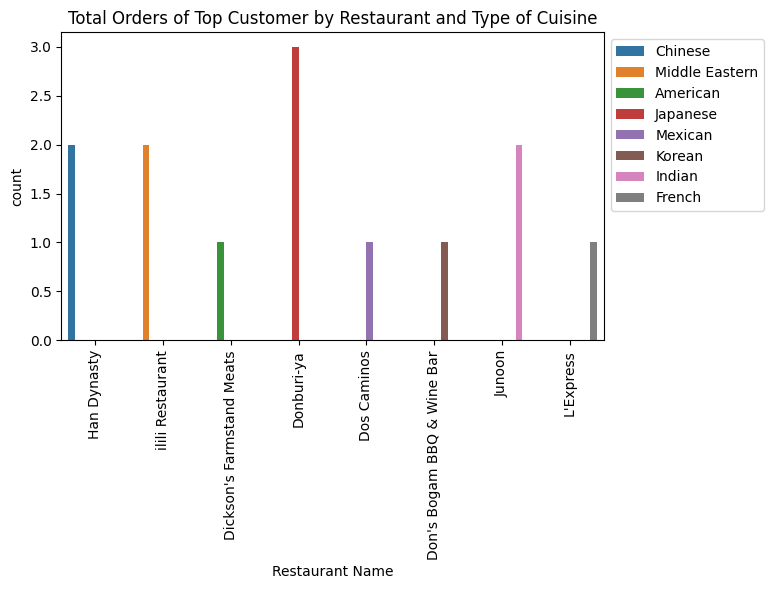

In [ ]:
plt.figure(figsize=(7,4))
plt.title('Total Orders of Top Customer by Restaurant and Type of Cuisine')
sns.countplot(data=num_1_customer, x='restaurant_name', hue='cuisine_type');
plt.xlabel('Restaurant Name')
plt.xticks(rotation=90);
plt.legend(bbox_to_anchor=(1, 1));

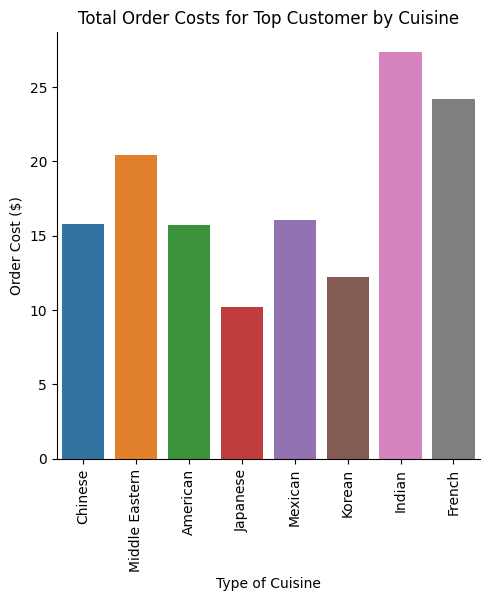

In [ ]:
sns.catplot(x='cuisine_type', y='cost_of_the_order', data=num_1_customer, kind='bar', errorbar=None);
plt.title('Total Order Costs for Top Customer by Cuisine')
plt.xlabel('Type of Cuisine')
plt.xticks(rotation=90);
plt.ylabel('Order Cost ($)');

##Observations about the Top Customer:
The Top Customer with the highest number of orders on the Food Hub app has:
* made 13 orders on the Food Hub app
* given 7 ratings for 5 types of cuisine
 * rating 3 and 4 for Middle Eastern cuisine,
  * rating 3 for Chinese,
  * rating 4 for American, and
  * rating 5 twice for Japanese and once for Indian cuisine,
* an average order cost of \$17.37 with the highest cost of 31.43,
* the 3 most expensive orders for Indian, Fench, and Middle Eastern cuisines, all with orders costing more than $20
* has not ordered from the Top 5 Restaurants by number of orders,
* has ordered from 8 different restaurants with 8 different types of cuisine,
* has ordered 3 times from the same Japanese restaurant, Donburi-ya, all on weekdays
* has ordered 7 times on weekdays and 6 times on weekends.

Based on this top customer, a customer persona profile shows:
* adventurous tastes in terms of types of cuisine and different restaurants,
* rates their order about half of the time,
* spends between \$6.64 to 31.43 on orders with an average order cost of $17.37, and
* is about equally likely to order on week days or weekends.


#Details Abount Top 14 Customers (by number of orders)

In [ ]:
# to find customer ids for top customers
#over_10_df # 52832 # get customer id for this dataframe subset to locate more details in larger dataframe
#six_to_ten_df # get customer ids for this dataframe subset to locate more details in larger dataframe

In [ ]:
# get more information about customer with more than 6 orders
#create dataframe of top 14 customers with over 6 orders on Food Hub app
list_ids = [47440, 83287, 250494, 259341, 82041, 65009, 276192, 97079, 97991, 107909, 275689, 60052, 115213]
six_to_10__plus_customers = pd.DataFrame() #set empty df
six_to_10__plus_customers = df.loc[df['customer_id']== 52832]

for id in list_ids:
  customer_data = df.loc[df['customer_id'] == id]
  six_to_10__plus_customers = pd.concat([six_to_10__plus_customers, customer_data])

#six_to_10__plus_customers # check for correctness
six_to_10__plus_customers.describe().T


count        mean       std         min         25%  \
order_id              104.000 1477489.183   552.993 1476555.000 1476998.500   
customer_id           104.000  127081.058 86262.886   47440.000   60052.000   
cost_of_the_order     104.000      17.764     8.328       5.770      11.085   
rating                 64.000       4.406     0.684       3.000       4.000   
food_preparation_time 104.000      27.010     4.633      20.000      23.000   
delivery_time         104.000      24.183     4.792      15.000      20.000   
total time            104.000      51.192     6.422      38.000      46.000   

                              50%         75%         max  
order_id              1477486.000 1477990.000 1478404.000  
customer_id             90183.000  250494.000  276192.000  
cost_of_the_order          15.935      24.212      33.370  
rating                      5.000       5.000       5.000  
food_preparation_time      27.000      31.000      35.000  
delivery_time              24.000      28.000      33.000  
total time                 52.500      55.000      64.000

In [ ]:
six_to_10__plus_customers.groupby(['rating'])['cuisine_type'].value_counts()

rating  cuisine_type  
3.000   American           3
        Chinese            1
        Italian            1
        Japanese           1
        Middle Eastern     1
4.000   American          13
        Japanese           5
        Chinese            2
        Middle Eastern     2
        Italian            1
        Mexican            1
5.000   Japanese           9
        American           8
        Indian             6
        Chinese            5
        Italian            4
        Middle Eastern     1
Name: cuisine_type, dtype: int64

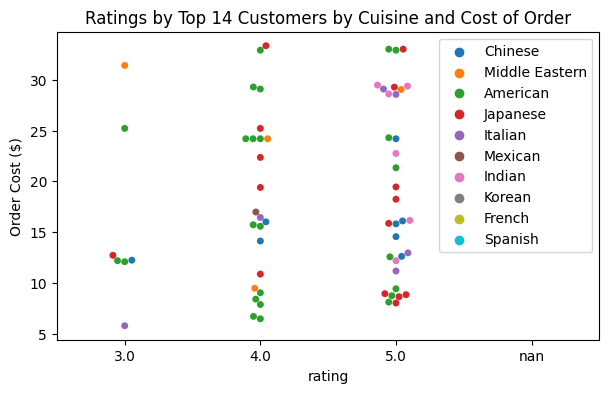

In [ ]:
plt.figure(figsize=(7,4))
plt.title('Ratings by Top 14 Customers by Cuisine and Cost of Order')
sns.swarmplot(data=six_to_10__plus_customers, x='rating', y='cost_of_the_order', hue='cuisine_type');
plt.ylabel('Order Cost ($)');
plt.legend(bbox_to_anchor=(1, 1));

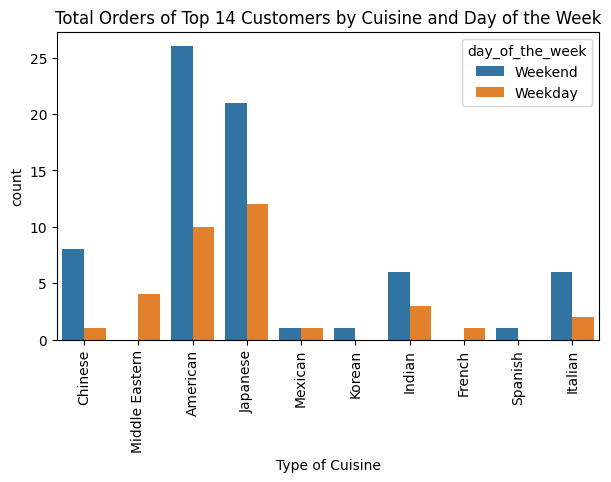

In [ ]:
plt.figure(figsize=(7,4))
plt.title('Total Orders of Top 14 Customers by Cuisine and Day of the Week')
sns.countplot(data=six_to_10__plus_customers, x='cuisine_type', hue='day_of_the_week');
plt.xlabel('Type of Cuisine')
plt.xticks(rotation=90);

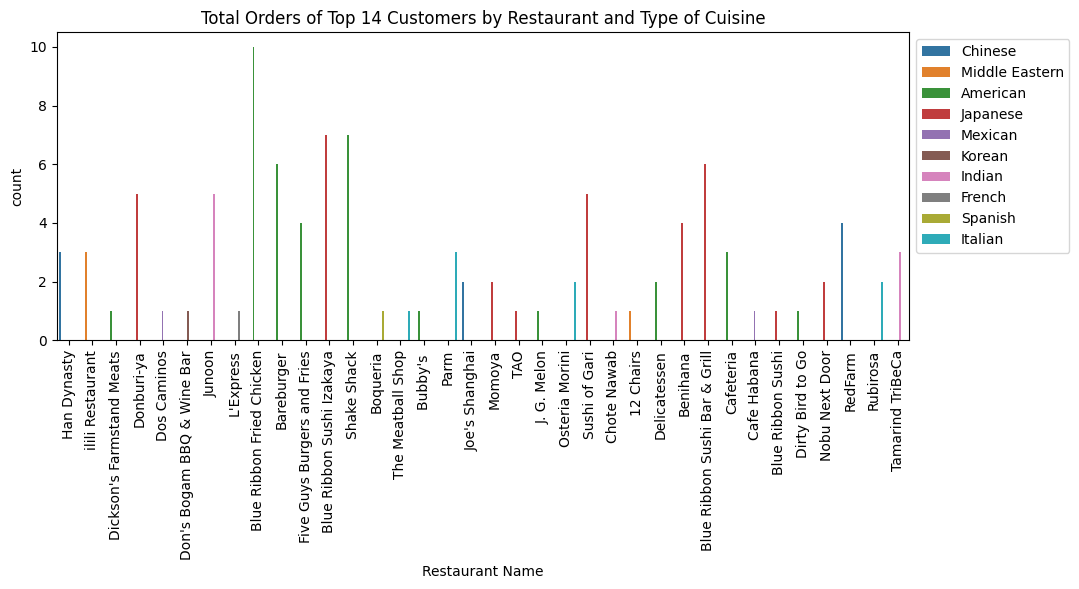

In [ ]:
plt.figure(figsize=(11,4))
plt.title('Total Orders of Top 14 Customers by Restaurant and Type of Cuisine')
sns.countplot(data=six_to_10__plus_customers, x='restaurant_name', hue='cuisine_type');
plt.xlabel('Restaurant Name')
plt.xticks(rotation=90);
plt.legend(bbox_to_anchor=(1, 1));

In [ ]:
six_to_10__plus_customers['restaurant_name'].nunique()

36

In [ ]:
six_to_10__plus_customers['cuisine_type'].nunique()

10

In [ ]:
six_to_10__plus_customers['restaurant_name'].value_counts()

Blue Ribbon Fried Chicken        10
Blue Ribbon Sushi Izakaya         7
Shake Shack                       7
Blue Ribbon Sushi Bar & Grill     6
Bareburger                        6
Donburi-ya                        5
Junoon                            5
Sushi of Gari                     5
RedFarm                           4
Benihana                          4
Five Guys Burgers and Fries       4
Han Dynasty                       3
Parm                              3
Cafeteria                         3
ilili Restaurant                  3
Tamarind TriBeCa                  3
Momoya                            2
Rubirosa                          2
Nobu Next Door                    2
Osteria Morini                    2
Delicatessen                      2
Joe's Shanghai                    2
Dos Caminos                       1
Dickson's Farmstand Meats         1
Dirty Bird to Go                  1
Blue Ribbon Sushi                 1
Cafe Habana                       1
Bubby's                     

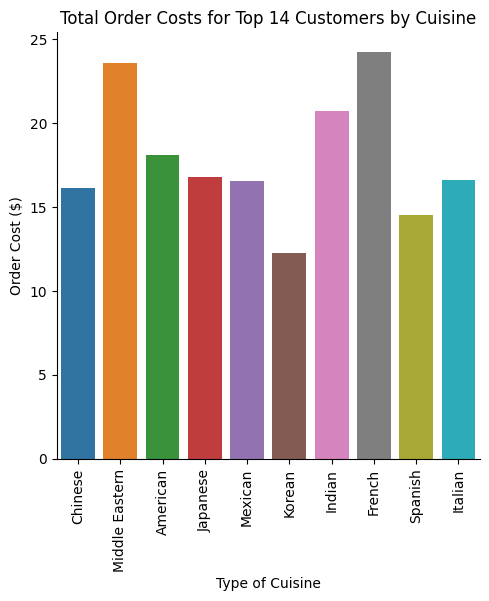

In [ ]:
sns.catplot(x='cuisine_type', y='cost_of_the_order', data=six_to_10__plus_customers, kind='bar', errorbar=None);
plt.title('Total Order Costs for Top 14 Customers by Cuisine')
plt.xlabel('Type of Cuisine')
plt.xticks(rotation=90);
plt.ylabel('Order Cost ($)');

##Observations about the Top 14 Customers with more than 6 orders from the Food Hub app:
The Top 14 Customers with the highest number of orders on the Food Hub app have:
* made 104 orders on the Food Hub app
* given 64 ratings for 6 types of cuisine
  * rating 3 has the most ratings for American cuisine(3),
  * rating 4 has the most ratings for American cuisine (13) and Japanese (5), and
  * rating 5 has the most ratings for Japanese (9) and American (8) cuisine,
* an average order cost of \$17.64 with the highest cost of 33.37,
* the 3 most expensive orders for French, Middle Eastern, and Indian cuisines, all with orders costing more than $20
* most orders have been from Blue Ribbon Fried Chicken (10), followed by Blue Ribbon Sushi Izakaya and Shake Shack (both with 7 orders)
* has ordered from 36 different restaurants with 10 different types of cuisine, and
* has ordered over 25 times for American cuisine on weekends and over 20 times for Japanese cuisine also on weekends.

Based on the top 14 customers, a customer persona profile shows:
* have more expensive orders for French, Middle Easterm, and Indian cuisine,
* but orders American and Japanese cuisine more frequently,
* rates their orders  little more than half of the time,
* spends between \$5.77 to 33.37 on orders with an average order cost of $17.64, and
* is more likely to order on weekends.

#Details about Top Restaurants by Number of Orders

In [ ]:
#prepare list of top 7 restaurants
# 4 restaurants with over 100 orders
#over_100_df # check contents
# 3 restaurants with 50-100
#fifty_to_100_df # check contents
# 11 restaurants with 25-50 orders
#twentyfive_to_50_df

In [ ]:
# get more information about top 7 restaurants with more than 50 orders
#create dataframe of top 7 restaurants with more than 50 orders on Food Hub app
list_names = ['Shake Shack','The Meatball Shop','Blue Ribbon Sushi','RedFarm','Blue Ribbon Fried Chicken','Sushi of Gari','Parm']
top_7_restaurants = pd.DataFrame() #set empty df


for name in list_names:
  restaurant_data = df.loc[df['restaurant_name'] == name]
  top_7_restaurants = pd.concat([top_7_restaurants, restaurant_data ])

#top_7_restaurants # check for correctness
top_7_restaurants.describe().T


count        mean        std         min         25%  \
order_id              825.000 1477501.678    535.892 1476548.000 1477054.000   
customer_id           825.000  173466.645 115849.864    5139.000   77857.000   
cost_of_the_order     825.000      16.482      7.382       4.750      12.130   
rating                505.000       4.307      0.753       3.000       4.000   
food_preparation_time 825.000      27.595      4.675      20.000      23.000   
delivery_time         825.000      24.341      4.886      15.000      21.000   
total time            825.000      51.936      6.745      35.000      47.000   

                              50%         75%         max  
order_id              1477502.000 1477950.000 1478444.000  
customer_id            131645.000  279895.000  404649.000  
cost_of_the_order          14.120      22.260      33.370  
rating                      4.000       5.000       5.000  
food_preparation_time      28.000      32.000      35.000  
delivery_time              25.000      28.000      33.000  
total time                 52.000      56.000      68.000

In [ ]:
top_7_restaurants['cuisine_type'].value_counts()

American    315
Italian     200
Japanese    196
Chinese     114
Name: cuisine_type, dtype: int64

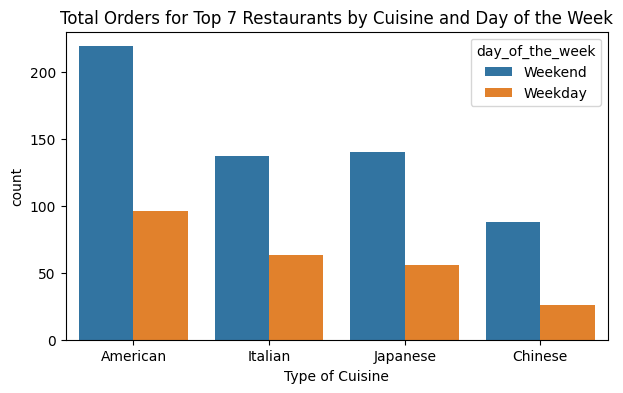

In [ ]:
plt.figure(figsize=(7,4))
plt.title('Total Orders for Top 7 Restaurants by Cuisine and Day of the Week')
sns.countplot(data=top_7_restaurants, x='cuisine_type', hue='day_of_the_week');
plt.xlabel('Type of Cuisine');

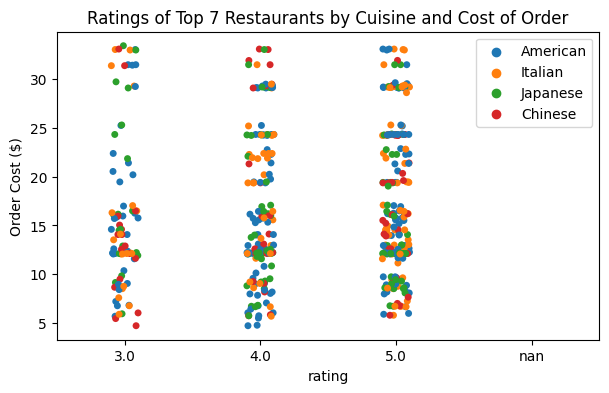

In [ ]:
plt.figure(figsize=(7,4))
plt.title('Ratings of Top 7 Restaurants by Cuisine and Cost of Order')
sns.stripplot(data=top_7_restaurants, x='rating', y='cost_of_the_order', hue='cuisine_type');
plt.ylabel('Order Cost ($)');
plt.legend(bbox_to_anchor=(1, 1));

In [ ]:
top_7_restaurants.groupby(['rating'])['cuisine_type'].value_counts()

rating  cuisine_type
3.000   American        34
        Italian         19
        Japanese        19
        Chinese         17
4.000   American        71
        Japanese        39
        Italian         37
        Chinese         25
5.000   American        92
        Italian         67
        Japanese        52
        Chinese         33
Name: cuisine_type, dtype: int64

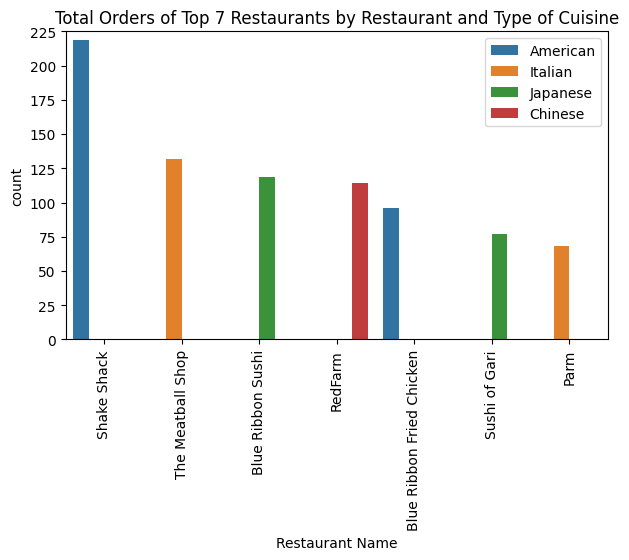

In [ ]:
plt.figure(figsize=(7,4))
plt.title('Total Orders of Top 7 Restaurants by Restaurant and Type of Cuisine')
sns.countplot(data=top_7_restaurants, x='restaurant_name', hue='cuisine_type');
plt.xlabel('Restaurant Name')
plt.xticks(rotation=90);
plt.ylim(0,225)
plt.legend(bbox_to_anchor=(1, 1));

In [ ]:
top_7_restaurants.groupby(['restaurant_name'])['cuisine_type'].value_counts()

restaurant_name            cuisine_type
Blue Ribbon Fried Chicken  American         96
Blue Ribbon Sushi          Japanese        119
Parm                       Italian          68
RedFarm                    Chinese         114
Shake Shack                American        219
Sushi of Gari              Japanese         77
The Meatball Shop          Italian         132
Name: cuisine_type, dtype: int64

<Figure size 700x400 with 0 Axes>

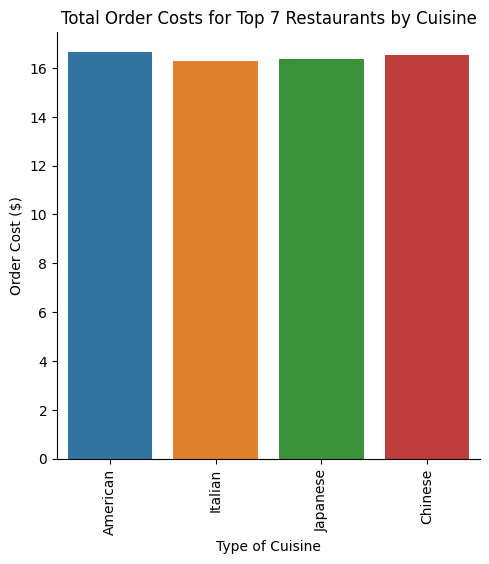

In [ ]:
plt.figure(figsize=(7,4));
sns.catplot(x='cuisine_type', y='cost_of_the_order', data=top_7_restaurants, kind='bar',errorbar=None);
plt.title('Total Order Costs for Top 7 Restaurants by Cuisine');
plt.xlabel('Type of Cuisine');
plt.xticks(rotation=90);
plt.ylabel('Order Cost ($)');

In [ ]:
top_7_restaurants.groupby(['cuisine_type'])['cost_of_the_order'].mean()

cuisine_type
American   16.641
Chinese    16.547
Italian    16.290
Japanese   16.387
Name: cost_of_the_order, dtype: float64

##Observations about the Top 7 Restaurants with more than 50 orders from the Food Hub app:
The Top 7 Restaurants with the highest number of orders on the Food Hub app have:
* have 825 orders on the Food Hub app,
* are of 4 different types of cuisine:
  * American
  * Italian
  * Japanese
  * Chinese,
* most orders are on weekends,
* given 505 ratings for 4 types of cuisine
  * rating 3 has the most ratings for American (34) and Italian (19) cuisines,
  * rating 4 has the most ratings for American (71) and Japanese (39) cuisines,
  * rating 5 has the most ratings for American (92) and Italian (67) cuisine,
* an average order cost of \$16.48 with the highest cost of 33.37,
* average 28 minute food preparation time for orders,
* average 24 minutes delivery time for orders
* the 4 types of cuisine have orders costing an average of $16 or more,
* most orders have been from Shack Shack (219), followed by The Meatball Shop (132), Blue Ribbon Sushi (119) and RedFarm (114).

Based on the top 7 restaurants, a business profile shows:
* customers spend on average about the same amount for all 4 cuisine types represented by the top 7 restaurants,
* orders cost between \$4.75 to 33.37 on orders with an average order cost of $16.48, and
* customers order more frequently on weekends.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# create new dataframe with subset of 2 columns from full dataframe
restaurants_rated = df[['restaurant_name','rating']].copy()
#restaurants_rated  # check for correctness, 1898 rows

# drop NaN values (ratings column) and reset df index
restaurants_rated.dropna(inplace=True)
restaurants_rated.reset_index(drop=True, inplace=True)
restaurants_rated  # check for correctness, 1162 rows (1898 - 736 NaNs)

# total number of ratings for restaurants and create column of total rating count, saved as new df
restaurants_rated_50_ratings = restaurants_rated.groupby(['restaurant_name'])['rating'].count().reset_index(name='total ratings count')
restaurants_rated_50_ratings # check for corectness, 156 rows

# filter for restaurants with total rating count over 50
restaurants_rated_50_ratings = restaurants_rated_50_ratings[restaurants_rated_50_ratings['total ratings count'] > 50]
#print(restaurants_rated_50_ratings) # check for corectness, 4 rows

# calclate average rating for restaurants and create column of mean rating, saved as new df
restaurants_rated_ave_4 = restaurants_rated.groupby(['restaurant_name'])['rating'].mean().reset_index(name='ave. rating')
restaurants_rated_ave_4 # check for corectness, 156 rows

# filter for restaurants with mean rating over 4
restaurants_rated_ave_4 = restaurants_rated_ave_4[restaurants_rated_ave_4['ave. rating'] > 4]
#print(restaurants_rated_ave_4) # check for corectness, 110 rows

# merge 2 dataframes to find restaurants the meet both criteria on left (fewer restaurants)
merged_criteria = pd.merge(restaurants_rated_50_ratings, restaurants_rated_ave_4, on = 'restaurant_name', how='left')

# display restaurant names that match selction criteria for promotion
print('The following restaurants are eligible for the promotional offer: \n')
merged_criteria



### alternative approach from senior data scientist, a.k.a. Bard :)
# #Group the dataframe by 'restaurant_name' and calculate the average rating and count of ratings for each restaurant
# grouped_restaurants = restaurants_rated.groupby('restaurant_name').agg(average_rating=('rating', 'mean'), rating_count=('rating', 'count'))

# # Filter the grouped dataframe to include restaurants with a rating count greater than 50 and an average rating greater than 4
# filtered_restaurants = grouped_restaurants[(grouped_restaurants['rating_count'] > 50) & (grouped_restaurants['average_rating'] > 4)]
# print(filtered_restaurants)

# Display the list of restaurants that meet the criteria for the promotional offer
# print("Restaurants eligible for the promotional offer:")
# for restaurant in filtered_restaurants.index:
#     print(restaurant)


The following restaurants are eligible for the promotional offer: 



restaurant_name  total ratings count  ave. rating
0  Blue Ribbon Fried Chicken                   64        4.328
1          Blue Ribbon Sushi                   73        4.219
2                Shake Shack                  133        4.278
3          The Meatball Shop                   84        4.512

#### Observations:
There are 4 restaurants that meet the promotional offer criteria:
Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack, and The Meatball Shop.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# create list of revenue the company earns for each order based on criteria
revenue = []
for cost in df['cost_of_the_order']:
  if cost > 20:
      revenue_order = (cost * 0.25)
      revenue.append(revenue_order)
  elif cost > 5:
      revenue_order = (cost * 0.15)
      revenue.append(revenue_order)
  else:
      revenue.append(0)

# add list of each order's revenue as a new column in dataset
df['revenue_of_the_order'] = revenue
#df # check for correctness

# calculate total revenue across all the orders
df['revenue_of_the_order'].sum()


6166.303

#### Observations:
The total revenue earned by the company across all orders is \$6,166.30.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# create new column in dataframe of total time
df['total time'] = df['food_preparation_time'] + df['delivery_time']
# df.head() #check for new column

# filter for orders that take > 60 minutes total time
time_over_60 = df[df['total time'] > 60]
# print(len(time_over_60)) #check caluculations

# calculate percentage of all orders that take > 60 minutes
percent_time_over_60 = ((time_over_60.shape[0])/(df.shape[0])) * 100
percent_time_over_60


10.537407797681771

#### Observations:  
Of all the orders on the Food Hub app, 10.5% take more than 60 minutes to get delivered from the time the order was placed and confirmed by the restaurant.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# sort data by weekend and weekdays into 2 subset dfs
weekend_orders = df[df['day_of_the_week'] == 'Weekend']
#weekend_orders.head() #check subset of dataframe

weekday_orders = df[df['day_of_the_week'] == 'Weekday']
#weekday_orders.head() #check subset of dataframe

# calculate mean for each df or for each grouping
print('Average weekend orders delivery time: ',weekend_orders['delivery_time'].mean())
print('Average weekday orders delivery time: ',weekday_orders['delivery_time'].mean())


Average weekend orders delivery time:  22.4700222057735
Average weekday orders delivery time:  28.340036563071298


#### Observations:
The average delivery time on the weekend is 22.5 minutes.  The average delivery time on weekdays is 28.3 minutes.  Orders made on the weekend are delivered more quickly.

Since the company that provides the Food Hub app also supplies the delivery drivers, it is a variable that the FoodHub company can have a direct impact on.

The delivery time is shorter on weekend days that on weekdays.

This could be becasue there are more delivery drivers available on the weekends, since many people are delivery drivers as a second job.

As mentioned previously, the food preparation time is fairly uniform in distribution and is the pervue of the restaurant.  The delivery drivers, however, are provided by the Food Hub company.  THerefore, the company may consider incentives for delivery drivers to work more during the weekdays.

More information could be gathered to assist in understanding this trend.  The time of day of the orders could show if delivery times are slower during higher traffic times on weekdays.  The day of the week orders are made could also give more specific information about which days are more or less popluar for ordering with the Food Hubs app.  Also, delivery distance coule give more information about the delivery times so other trends could be explored.


### Conclusion and Recommendations



### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

Determining the factors influencing the customer experience is slightly hampered by 39% of the orders not receiving ratings.  Also, most customers, 65%, have only used the Food Hub app one time.  

There were no correlations observed between numeric variables within the dataset.  

There were not large differences in ratings among the different types of cuisine.

* There are 178 different restaurants in the dataset and these restaurants represent 14 different types of cuisine.  The most popular restaurant is Shake Shack and the most popular cuisine is American in the dataset.
* Of the 14 different types of cuisine:
 * 4 types have over 200 orders,
   * American, Japanese, Italian, and Chinese,
 * 4 types have 40 to 100 orders,
   * Mexican, Indian, Middle Eastern, and Mediterranean,
 * 5 types have 10 to 40 orders, and
   * Thai, French, Southern, Korean, and Spanish,
 * 1 has less than 10 total orders
   * Vietnamese

* 65.3%, have ordered one time with the Food Hub app, 33.5%, have ordered 2-5 times, 1.08%, have ordered 6-10 times, and 0.08%, have used the Food Hub app to order 10 or more times.

*   The total cost of orders has a range of about \$30 with the minimum cost of \$4.47 and the maximum of \$35. The median is \$14.14 (lower than the average cost of \$16.50).
* The total revenue earned by the company across all orders is \$6,166.30.

* There are substantially more orders are made on the weekend with a total of 1351 orders or 71% of all orders.  Week day orders total 547 orders or 29%.

* There is faster delivery time for orders made on the weekend when more food orders are made.  Even exploring different cuisine types using multivariate analysis, we can see the pattern continue.

 *   All median delivery times are shorter on weekend days for all cuisine types.  The average delivery time is 24 minutes and is near the median value is 25 minutes. The minimum delivery time is 15 minutes and the maximum is 33 minutes.

 * Even though there are fewer orders during the week days, the delivery time is longer.


* Using a multivariate analysis there is variation in the Food Prepration Times by day of week and type of cuisine:

 * Italian food has equal median Food Preparation Time for Weekends and Weekdays.

 * Cuisines that have faster median Food Preparation times on Weekends are:
   * American, Chinese, Middle Eastern, French, and Spanish.

 * The other cuisines with faster median Food Preparation times on Weekdays are:
   *  Korean, Japanese, Mexican, Indian, Mediterranean, Thai, Southern, and Vietnamese

* Total order costs varied some by day of the week and type of cuisine.
 * Though ranges vary, the median for order cost are about equal for the following cuisines on any day of the week:  Korean, Japanese, American, Indian, Italian, and Chinese.
   * Weekends have higher medians order costs for the following cuisines:
  * Mexican, Mediterranean,Thai, and Spanish.
   * Week days have higher median order costs for the following cuisines:
  * Middle Eastern, Southern, French, and Vietnamese.

* Of all the orders in the dataset, 736 orders, or 39%, were not given a rating. Of the orders that do have ratings, most  (588 or 31%) receive a rating of 5.
 * Ratings do not appear to vary greatly when visualized by type of cuisine and for the day of the week.  The Vietnamese cuisine, however, has the lowest rating on weekdays of all cuisines and of all days of the week.  There is also no ratings for Spanish cuisine on week days.
  * Korean, Middle Eastern, French cuisine has lower ratings on weekends than week days.
  * Southern, Mediterranean, Indian, American, and Thai cuisines have a lower average ratings on week days than weekends.


Based on the top customer (highest number of orders), a persona profile shows:
 * adventurous tastes in terms of types of cuisine and different restaurants,
 * rates their order about half of the time,
 * spends between \$6.64 to 31.43 on orders with an average order cost of $17.37, and
 * is about equally likely to order on week days or weekends.

Based on the top 14 customers (in terms of number of orders), a customer persona profile shows:
 * have more expensive orders for French, Middle Easterm, and Indian cuisine,
 * but orders American and Japanese cuisine more frequently,
 * rates their orders more than half of the time,
 * spends between \$5.77 to 33.37 on orders with an average order cost of $17.64, and
 * is more likely to order on weekends.

Based on the top 7 restaurants with the highest number of orders on the Food Hub app a business profile shows:
* 825 orders on the Food Hub app,
* are of 4 different types of cuisine:
  * American
  * Italian
  * Japanese
  * Chinese,
* customers spend on average about the same amount for all 4
* orders cost between \$4.75 to 33.37 on orders with an average order cost of $16.48,
* most orders are on weekends,
* average 28 minute food preparation time for orders, and
* average 24 minutes delivery time for orders.


### Recommendations:

Since the business question seeks to get an idea of demand of different restaurants to enhance the customer experience, the observations noted in this analysis, in addition to the questions the company has asked to guide the process, the following additional recommendations are made.

Specifically, related to delivery and food preparation times this analysis could provide insightful information so restarants can adjust staffing to meet food preparation needs for different cuisine types on different days of the week.

As well, since Food Hub also supplies the delivery drivers, it is a variable that the FoodHub company can have a direct impact on. Food Hub can consider different options to speed delivery times on weekdays for all types of cuisine.

* During week days, Korean, Japanese, Mexican, Indian, Meditteranean, Thai, Southern, and Vietnamese cuisines all have faster food preparation times, however the delivery times for all cuisines are slower on week days.
 * Trying more delivery drivers for these cuisines could enhance the customer experience with the Food Hub app on week days.
  * More delivery drivers may also improve the ratings for Indian, Mediterrean, Thai, and Vietnamese cuisines that also see lower ratings on week days despite the faster food preparation times for these cuisines on week days.
  * Since the median costs for Southern and Vietnamese cuisine orders are higher on week days as well, the lower ratings could impact the companies revenues.  
Investing in improving delivery times on weekdays could also improve customer ratings.  Having quicker delivery on week days in the cuisine types that already provide faster food preparation could create more business for the Food Hub app company and the restaurants.

With 784 customers, or 65.3%, having ordered only one time with the Food Hub app. Perhaps there could be incentives implemented to increase the number of repeat customers using the Food Hub app.  
* These incentives could also be leveraged to entice customers to order during week days.
* These incentives could also focus on the already popular cuisines:  American, Japanese, and Italian.
* The incentives could also focus on the less popular cuisines:
Korean, Spanish, and Vietnamese.
* Additionally, these incentives could also focus on the already popular restaurants:  Shake Shack, The Meatball Shop, and Blue Ribbon Sushi.
* And, the  incentives could also focus on the 50 less popular restaurants that have only 1 order from the Food Hub app.  These 50 restaurants are listed in the Appendix below.

There are 736 'Not given' ratings of the 1898 total observations which is about 39% of the total data.  A 'Not given' rating is the most frequent value for the rating column.  There may be more information that could be obtained with more customers rating their order.
* Perhaps incentives could be implemented so more rating data can be obtained from customers.

Moving forward with collecting data for the Food Hub app, it is recommended to gather additional data.  The following could be collected and may lead to further meaningful insights for the Food Hub company to enhance the customer experience and gauge demand for restaurants:
* time of day and day of week data can give more detailed information on app usage (eg. Are there more lunch or dinner orders?, Of the weekday or weekend orders, what days are more or less popular? Do high traffic times impact delivery times?)
* distance of delivery could show how delivery times may vary and even give more information about the customers (eg. Are customers closer or farther away from the restaurants?  Are there any trends between distance and types of cuisine?)

More information could be collected on restaurants with highest number of orders to see if their popularity can be replicated:
* Do some restaurants use coupons or have specials when ordering through the Food Hub app?
* Are the more popular restaurants on the app closer or further away from the customers ordering?
* Do the more popular restaurants do more marketing?

Also, more information could be collected on cuisines with highest number of orders to see if their popularity can be replicated
* Do the more popular cuisines reflect the cultural make-up of the area?
* Do some types of cuisine use coupons or have specials when ordering through the Food Hub app?  Or for days of the week?
* Do the more popular types of cuisine have fewer restaurant availability and lead to more delivery orders?

Based on the current dataset, the following recommendations are presented for stakeholder consideration.


#Appendix

###Restaurants on the bottom 50 that only have 1 order on Food Hub:

Le Zie 2000 Trattoria            1
Cafe de La Esquina               1
Sarabeth's West                  1
Frank Restaurant                 1
Hiroko's Place                   1
Rye House                        1
Lamarca Pasta                    1
67 Burger                        1
Lucky Strike                     1
Paul & Jimmy's                   1
Hampton Chutney Co.              1
Wa Jeal                          1
Hunan Manor                      1
Moonstruck on Second             1
Il Bambino                       1
Nha Trang One                    1
Market Table                     1
Emporio                          1
Galli Restaurant                 1
Coppola's East                   1
Kori Restaurant and Bar          1
Woorijip                         1
Crema Restaurante                1
The MasalaWala                   1
Anjappar Chettinad               1
Big Wong Restaurant _¤¾Ñ¼       1
Klong                            1
Haru Gramercy Park               1
Chote Nawab                      1
Pepe Giallo                      1
Taro Sushi                       1
Samurai Mama                     1
Hibino                           1
Balade                           1
Posto                            1
Kambi Ramen House                1
Wo Hop Restaurant                1
Spice Thai                       1
Gaia Italian Cafe                1
Chola Eclectic Indian Cuisine    1
Rohm Thai                        1
Dig Inn Seasonal Market          1
Socarrat Paella Bar              1
Alidoro                          1
Cipriani Le Specialita           1
Sushi Choshi                     1
Dos Caminos Soho                 1
La Follia                        1
Philippe Chow                    1
'wichcraft                       1

###Additional deliverables with cleaned dataframe

Additional dataframes created during anaylsis:
* customer_by_num_orders with customer ids, count of orders, customer id labels,
* restaurant_rank_num_orders with restaurant name and count of orders
* weekend_cuisine_faves with cuisine type, day of week, and count of orders,
* over_20_df with orders with cost over $20,
* time_over_60_df with orders that took over 60 minutes to get food to customer,
* over_30_to_33_df for delivery time,
* btwn_24_to_30_df for delivery time,
* under_24_df for delivery time
* restaurants_rated with restaurants that have ratings
* restaurants_rated_50_ratings with restaurants that have more than 50 ratings,
* reestaurants_rated_ave_4 with restaurants that have more than 4 for average ratings,
* over_100_df with restaurants that have more than 100 orders,
* fifty_to_100_df with restaurants that have 51-100 orders,
* twentyfive_to_50_df with restaurants that have 26-50 orders,
* one_to_25_df with restaurants that have 1-25 orders,
* top_10_restaurants_num_orders with top 10 restaurants by number of orders,
* top_3_restaurants_100_plus,
* over_10_df with customer orders over 10 ,
* six_to_ten_df with customer orders 6-10,
* two_to_five_df with customer orders 2-5,
* one_df with customer orders of only 1,ß
* num_1_customer with all df information for top customer with most orders, and
* six_to_10__plus_customers with top customers with 6 or more orders.

Additional columns created in dataframe:
* total time from restaurant confirming order to delivery person confirming delivery,
* delivery time bins for 3 groups of delivery speeds, and
* revenue of the order with calcualtions of revenue generated by each order.

---